### Lucas Defante
### Matrícula 92300677

### Importação de bibliotecas e dos arquivos da base de dados

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 23.6 MB/s eta 0:00:00


In [ ]:
import glob
import os
import pandas as pd
import sweetviz as sv
import numpy as np
from time import perf_counter, strftime, localtime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_normal_operation_files = r"/content/drive/MyDrive/Colab Notebooks/data/3W/dataset/0"
path_to_severe_slugging_files = r"/content/drive/MyDrive/Colab Notebooks/data/3W/dataset/3"
path_to_flow_instability_files = r"/content/drive/MyDrive/Colab Notebooks/data/3W/dataset/4"

all_normal_operation_files = glob.glob(os.path.join(path_to_normal_operation_files, "*.csv"))
all_flow_instability_files = glob.glob(os.path.join(path_to_flow_instability_files, "*.csv"))

real_normal_operation_files = glob.glob(os.path.join(path_to_normal_operation_files, "WELL-*.csv"))
real_severe_slugging_files = glob.glob(os.path.join(path_to_severe_slugging_files, "WELL-*.csv"))
real_flow_instability_files = glob.glob(os.path.join(path_to_flow_instability_files, "WELL-*.csv"))

### Amostra das bases

In [ ]:
list_files = []
for filename in all_normal_operation_files:
    df_normal = pd.read_csv(filename, index_col=None, header=0)
    list_files.append(df_normal)

normal_frame = pd.concat(list_files, axis=0)

In [ ]:
normal_frame.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-02-01 02:02:07.000000,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,NaN,0.0,0.0
1,2017-02-01 02:02:08.000000,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,NaN,0.0,0.0
2,2017-02-01 02:02:09.000000,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,NaN,0.0,0.0
3,2017-02-01 02:02:10.000000,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,NaN,0.0,0.0
4,2017-02-01 02:02:11.000000,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,NaN,0.0,0.0


In [ ]:
list_files = []
for filename in all_flow_instability_files:
    df_anomaly = pd.read_csv(filename, index_col=None, header=0)
    list_files.append(df_anomaly)

flow_instability_frame = pd.concat(list_files, axis=0)

In [ ]:
flow_instability_frame.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-03-16 12:02:03.000000,38265830.0,13654450.0,117.1953,6029680.0,68.64587,3283309.0,NaN,0.0,4
1,2017-03-16 12:02:04.000000,38265830.0,13654520.0,117.1947,6030228.0,68.64333,3283309.0,NaN,0.0,4
2,2017-03-16 12:02:05.000000,38265830.0,13654580.0,117.1942,6030777.0,68.64080,3283308.0,NaN,0.0,4
3,2017-03-16 12:02:06.000000,38265830.0,13654650.0,117.1937,6031326.0,68.63827,3283308.0,NaN,0.0,4
4,2017-03-16 12:02:07.000000,38265830.0,13654710.0,117.1932,6031875.0,68.63573,3283308.0,NaN,0.0,4


In [ ]:
list_files = []
for filename in real_severe_slugging_files:
    df_real_anomaly = pd.read_csv(filename, index_col=None, header=0)
    list_files.append(df_real_anomaly)

real_severe_slugging_frame = pd.concat(list_files, axis=0)

In [ ]:
real_severe_slugging_frame.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-03-20 13:00:25.000000,0.0,14071870.0,117.1827,6085929.0,69.02943,3245327.0,NaN,0.0,3
1,2017-03-20 13:00:26.000000,0.0,14072180.0,117.1828,6087002.0,69.03323,3245327.0,NaN,0.0,3
2,2017-03-20 13:00:27.000000,0.0,14072490.0,117.1829,6088075.0,69.03702,3245327.0,NaN,0.0,3
3,2017-03-20 13:00:28.000000,0.0,14072800.0,117.1830,6089148.0,69.04082,3245327.0,NaN,0.0,3
4,2017-03-20 13:00:29.000000,0.0,14073110.0,117.1831,6090221.0,69.04462,3245327.0,NaN,0.0,3


In [ ]:
list_files = []
for filename in real_flow_instability_files:
    df_real_anomaly = pd.read_csv(filename, index_col=None, header=0)
    list_files.append(df_real_anomaly)

real_flow_instability_frame = pd.concat(list_files, axis=0)

In [ ]:
real_flow_instability_frame.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-03-16 12:02:03.000000,38265830.0,13654450.0,117.1953,6029680.0,68.64587,3283309.0,NaN,0.0,4
1,2017-03-16 12:02:04.000000,38265830.0,13654520.0,117.1947,6030228.0,68.64333,3283309.0,NaN,0.0,4
2,2017-03-16 12:02:05.000000,38265830.0,13654580.0,117.1942,6030777.0,68.64080,3283308.0,NaN,0.0,4
3,2017-03-16 12:02:06.000000,38265830.0,13654650.0,117.1937,6031326.0,68.63827,3283308.0,NaN,0.0,4
4,2017-03-16 12:02:07.000000,38265830.0,13654710.0,117.1932,6031875.0,68.63573,3283308.0,NaN,0.0,4


### Plots da distribuição dos dados

In [ ]:
print("Instâncias reais da normalidade:", normal_frame.shape[0])

Instâncias reais da normalidade: 9903155


In [ ]:
print("Instâncias reais da anomalia Intermitência Severa:", real_severe_slugging_frame.shape[0])

Instâncias reais da anomalia Intermitência Severa: 569152


In [ ]:
print("Instâncias reais da anomalia Instabilidade do Fluxo:", real_flow_instability_frame.shape[0])

Instâncias reais da anomalia Instabilidade do Fluxo: 2462076


In [ ]:
print("Instâncias simuladas da anomalia Instabilidade do Fluxo:", flow_instability_frame.shape[0]-real_flow_instability_frame.shape[0])

Instâncias simuladas da anomalia Instabilidade do Fluxo: 0


Text(0.5, 1.0, 'Distribuição dos dados entre as classes')

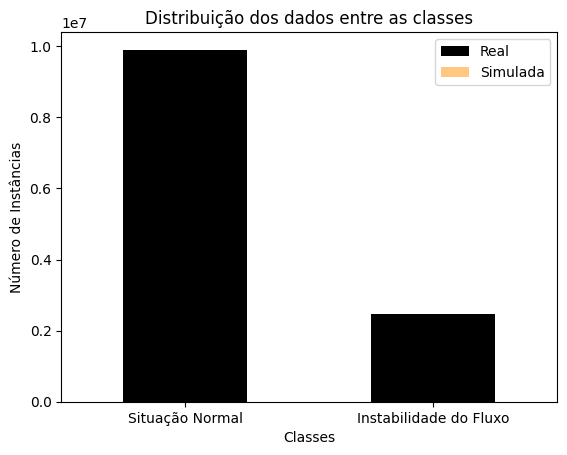

In [ ]:
pd.DataFrame({'Real': [normal_frame.shape[0], real_flow_instability_frame.shape[0]],
              'Simulada': [0, flow_instability_frame.shape[0]-real_flow_instability_frame.shape[0]]},
              index=['Situação Normal', 'Instabilidade do Fluxo']).plot(kind='bar', stacked=True, colormap='copper')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylabel('Número de Instâncias')
plt.title('Distribuição dos dados entre as classes')

([<matplotlib.patches.Wedge at 0x7b2721173220>,
 [Text(-0.815094373939108, 0.7386617369085892, 'Situação Normal'),
  Text(0.70553114040449, -0.8439347189916646, 'Instabilidade de Fluxo'),
  Text(1.0895061439157478, -0.151579557889043, 'Intermitência Severa')],
 [Text(-0.4445969312395134, 0.40290640195013955, '76.6%'),
  Text(0.38483516749335817, -0.46032802854090793, '19.0%'),
  Text(0.5942760784994988, -0.08267975884856892, '4.4%')])

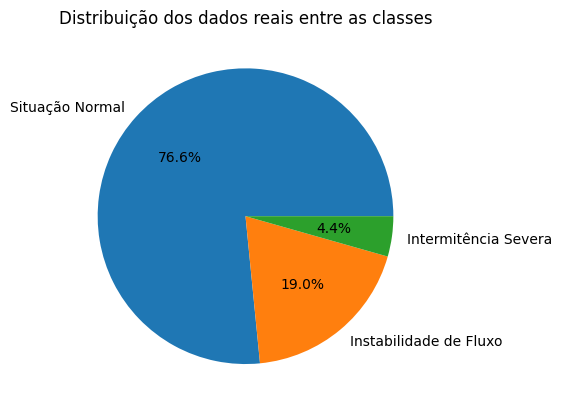

In [ ]:
sizes = [normal_frame.shape[0], real_flow_instability_frame.shape[0], real_severe_slugging_frame.shape[0]]
labels = 'Situação Normal', 'Instabilidade de Fluxo', 'Intermitência Severa'

fig, ax = plt.subplots()
plt.title('Distribuição dos dados reais entre as classes')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

### Exploração dos dados

In [ ]:
normal_frame.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,9.899597e+06,9.899597e+06,9.899584e+06,8.894080e+06,8.431000e+06,9.353595e+06,0.0,7.829427e+06,9439612.0
mean,1.061542e+07,1.376021e+07,1.149798e+02,5.225437e+06,7.286351e+01,2.092063e+08,NaN,2.898576e-03,0.0
std,1.758961e+07,5.034711e+06,4.679541e+00,4.319156e+06,1.053436e+01,5.397892e+08,NaN,6.747962e-02,0.0
min,-1.259876e+08,7.161897e+06,5.576065e+01,9.172205e+05,3.953000e+01,-5.339539e+05,NaN,0.000000e+00,0.0
25%,0.000000e+00,8.522292e+06,1.108599e+02,1.650587e+06,6.725748e+01,2.314459e+06,NaN,0.000000e+00,0.0
50%,0.000000e+00,1.384623e+07,1.167731e+02,2.477515e+06,7.345697e+01,2.331686e+06,NaN,0.000000e+00,0.0
75%,2.560079e+07,1.812018e+07,1.176361e+02,9.499473e+06,7.655065e+01,3.453385e+06,NaN,0.000000e+00,0.0
max,4.485805e+07,2.122635e+07,1.196061e+02,1.235933e+07,1.730961e+02,4.006530e+09,NaN,1.621652e+00,0.0


In [ ]:
flow_instability_frame.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,2.461318e+06,2.461009e+06,2.461020e+06,2.461404e+06,2.460950e+06,2.153661e+06,0.0,1.882467e+06,2462076.0
mean,9.596927e+06,1.610944e+07,9.532573e+01,7.132351e+06,9.215871e+01,5.680268e+08,NaN,5.493594e-01,4.0
std,1.270871e+07,2.170837e+06,2.643990e+01,2.218484e+06,5.806634e+01,8.120187e+08,NaN,6.904337e-01,0.0
min,0.000000e+00,9.478219e+06,5.570294e+01,1.859992e+06,2.903000e+01,-4.006206e+05,NaN,0.000000e+00,4.0
25%,0.000000e+00,1.525521e+07,5.888000e+01,6.027096e+06,3.773297e+01,4.236303e+06,NaN,0.000000e+00,4.0
50%,0.000000e+00,1.613956e+07,1.065436e+02,7.036581e+06,6.827203e+01,4.686814e+06,NaN,0.000000e+00,4.0
75%,2.366115e+07,1.649362e+07,1.175749e+02,7.678466e+06,1.730961e+02,1.740132e+09,NaN,1.380254e+00,4.0
max,4.231802e+07,2.088880e+07,1.181999e+02,1.199832e+07,1.730961e+02,2.027865e+09,NaN,2.384152e+00,4.0


A partir do describe já é possível identificar que a coluna T-JUS-CKGL não possui dados relevantes, portanto será descartada na análise. A coluna timestamp também será descartada pois apesar de trazer o momento no tempo em que a observação foi realizada, os dados já estão ordenados cronologicamente, sendo descartável essa primeira coluna.

In [ ]:
normal_frame.drop(columns=['timestamp', 'T-JUS-CKGL'], inplace=True)
flow_instability_frame.drop(columns=['timestamp', 'T-JUS-CKGL'], inplace=True)

                                             |          | [  0%]   00:00 -> (? left)


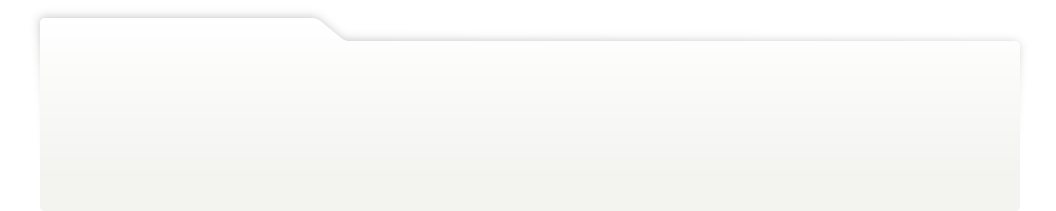
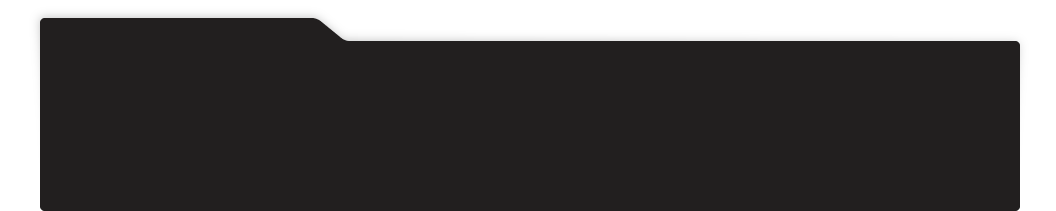
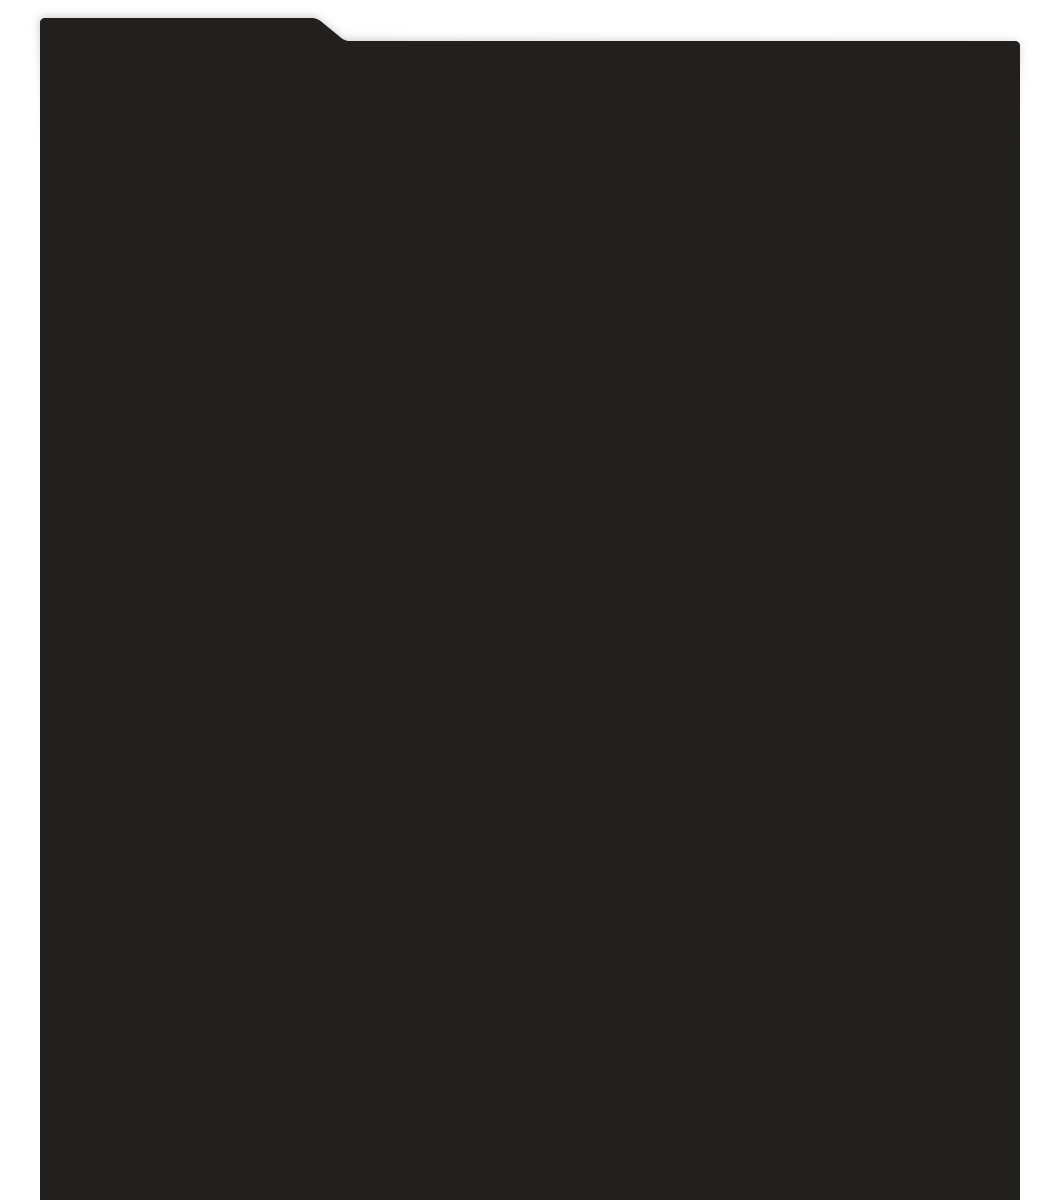
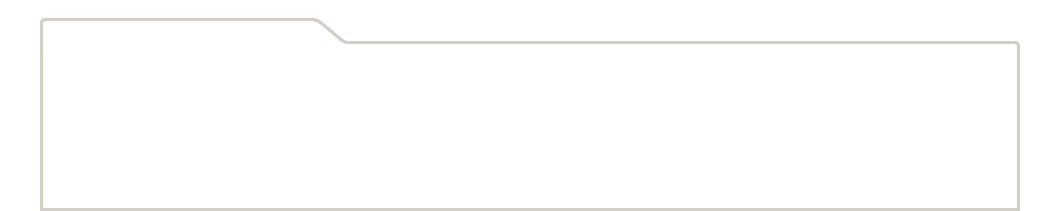
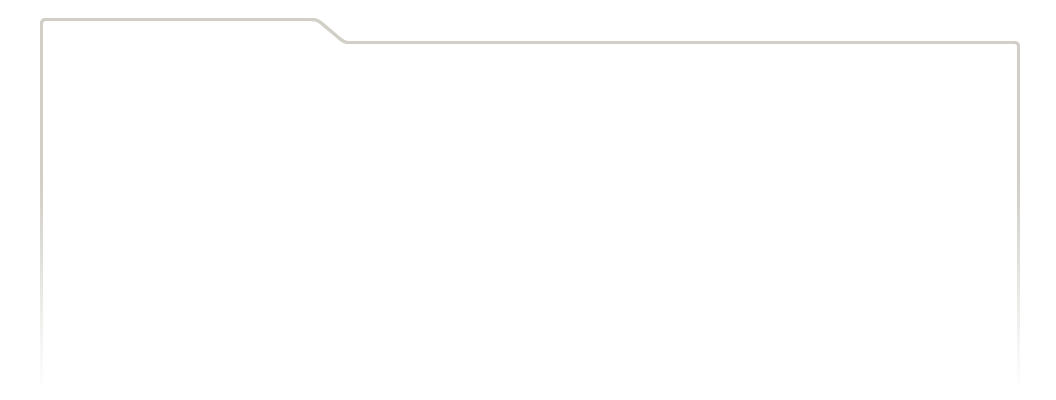
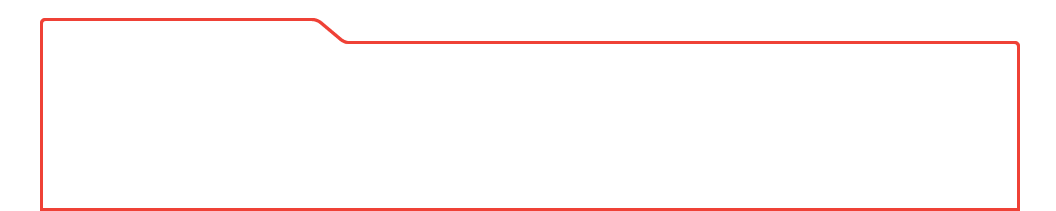
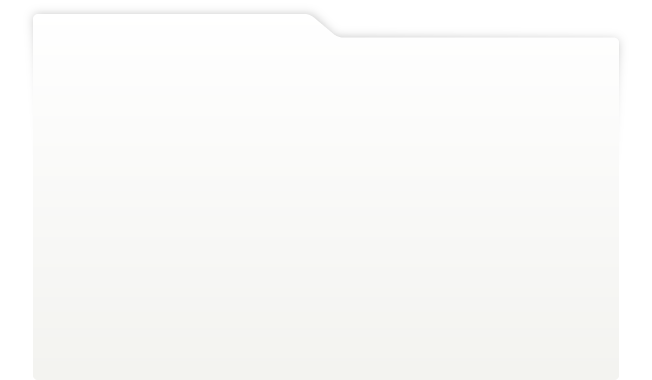
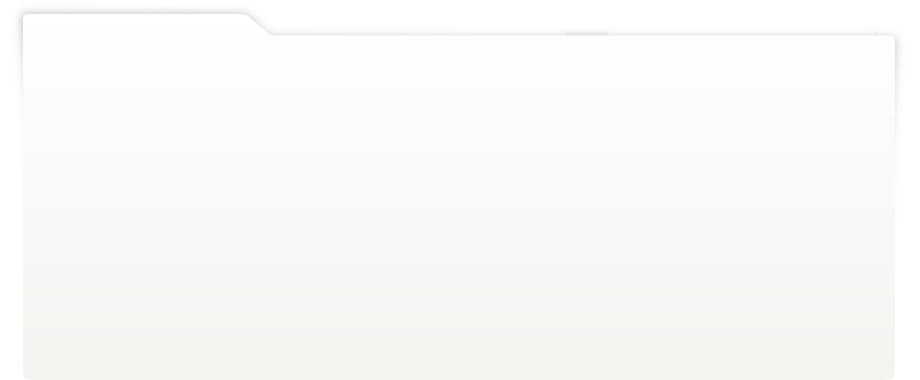
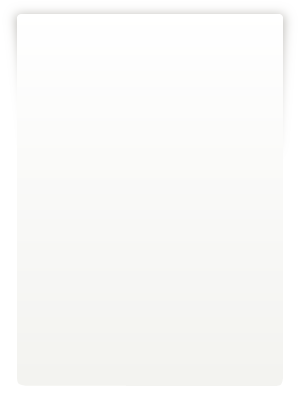
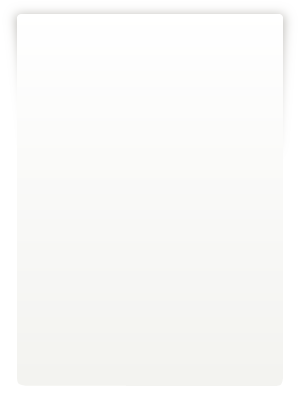
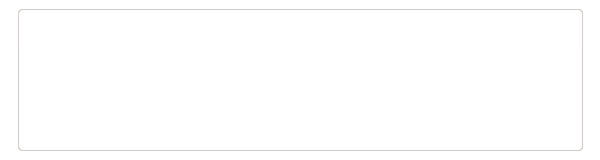
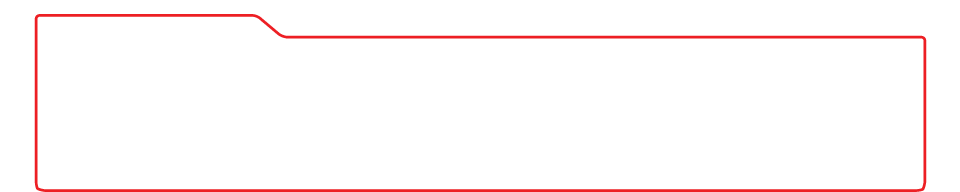
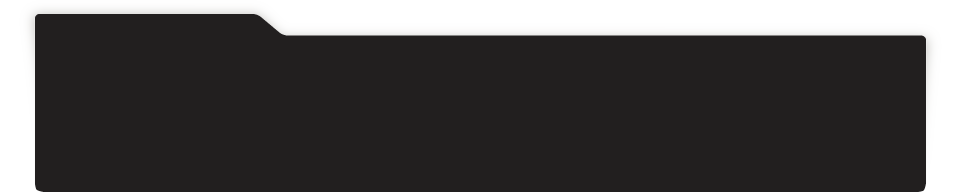
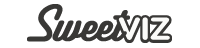
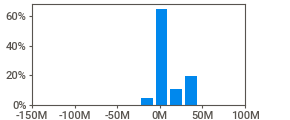
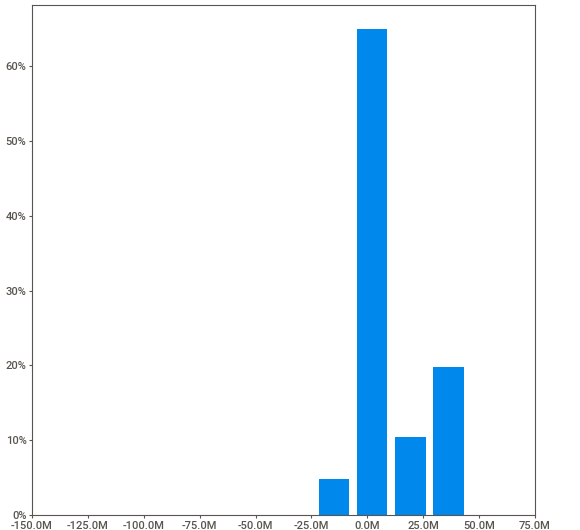
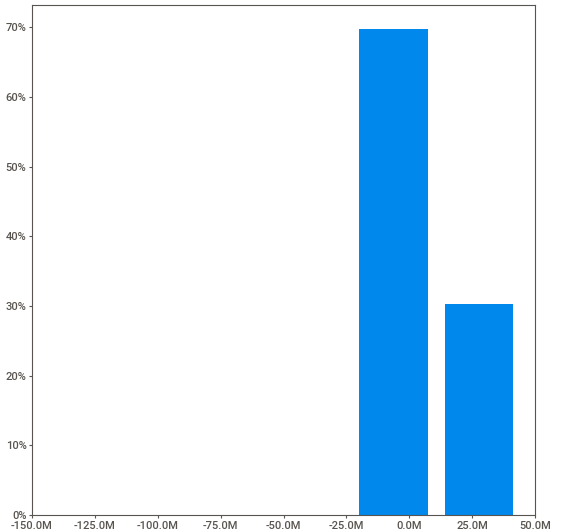
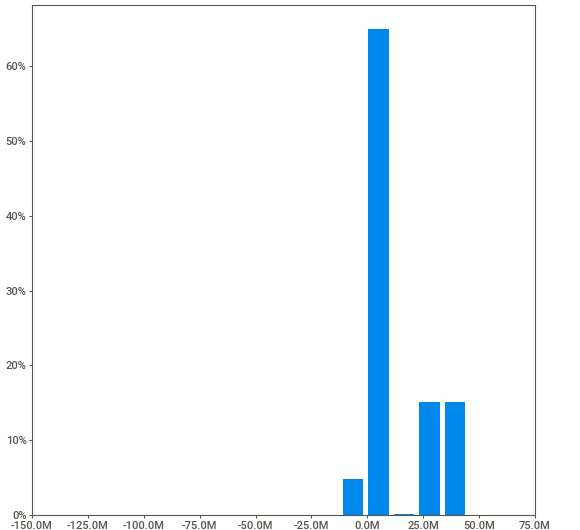
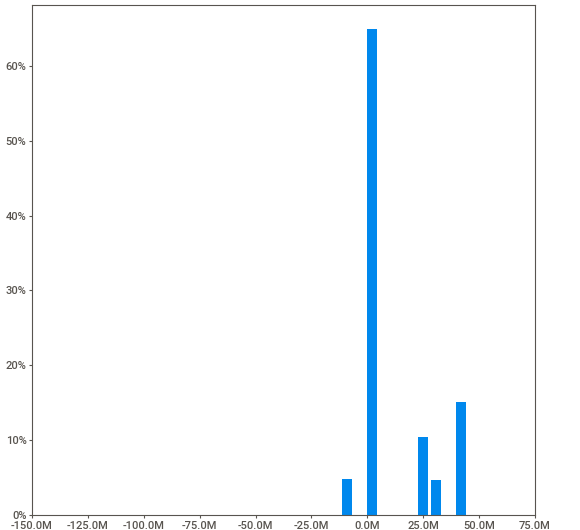
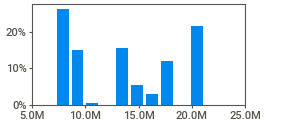
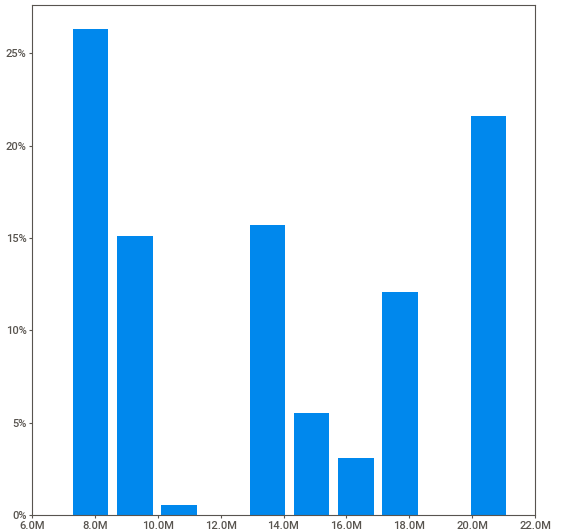
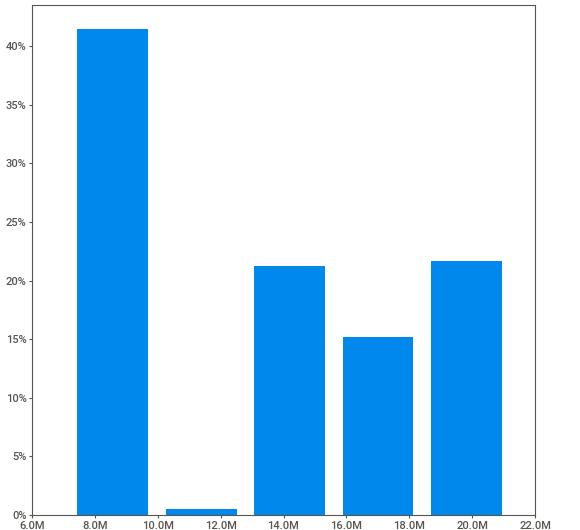
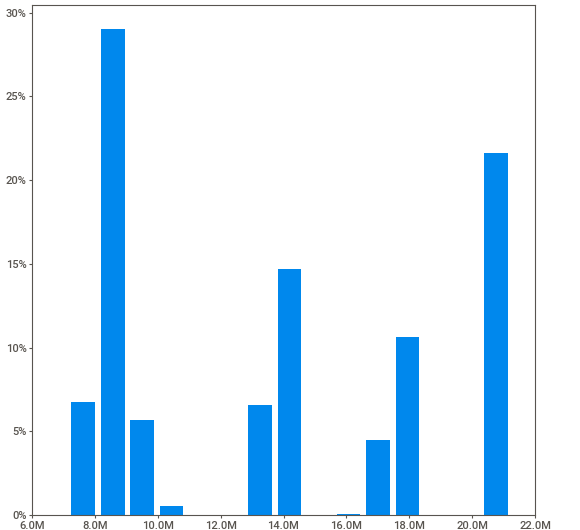
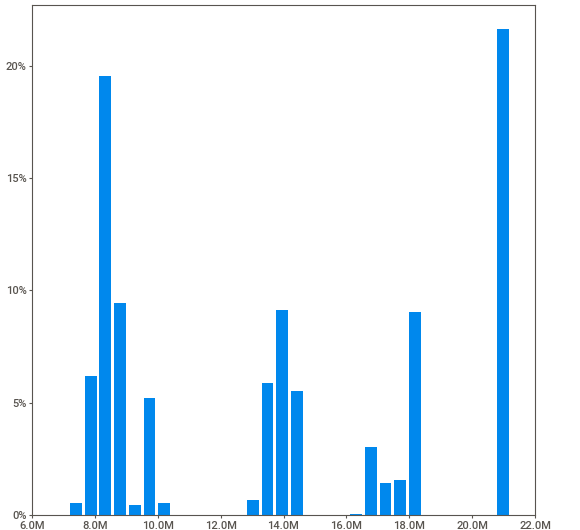
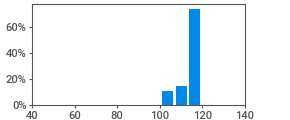
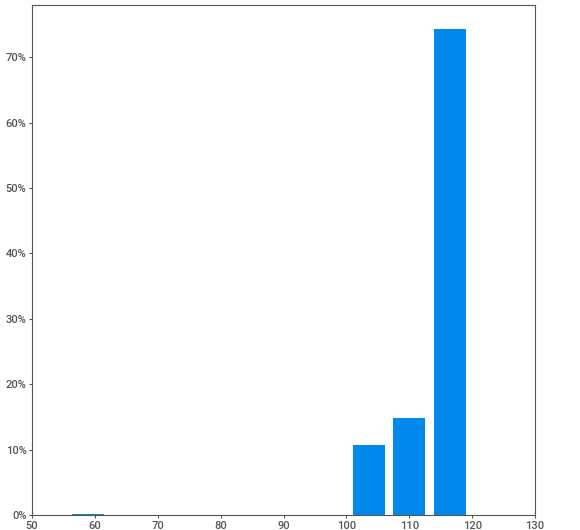
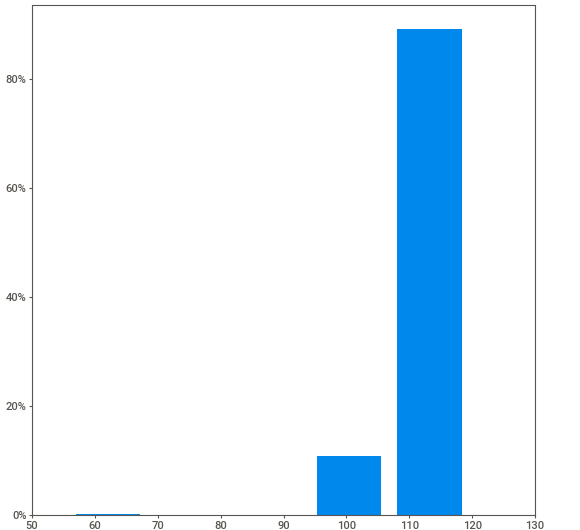
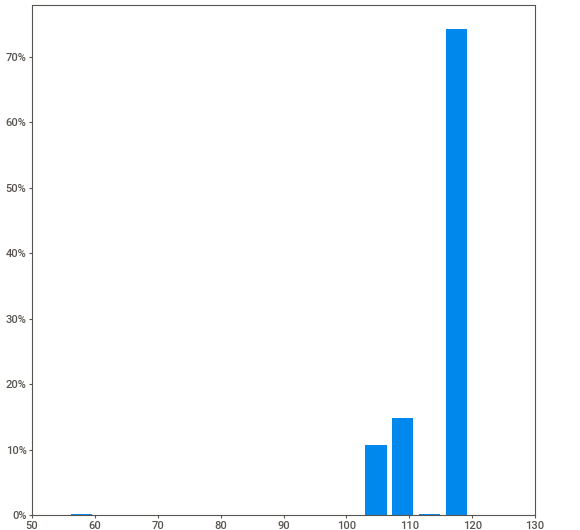
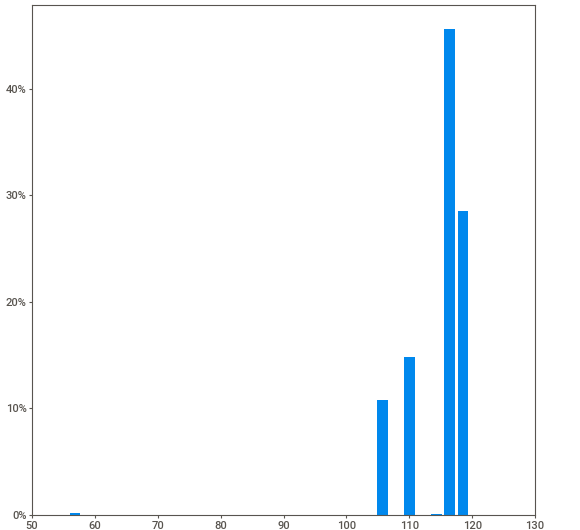
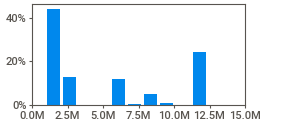
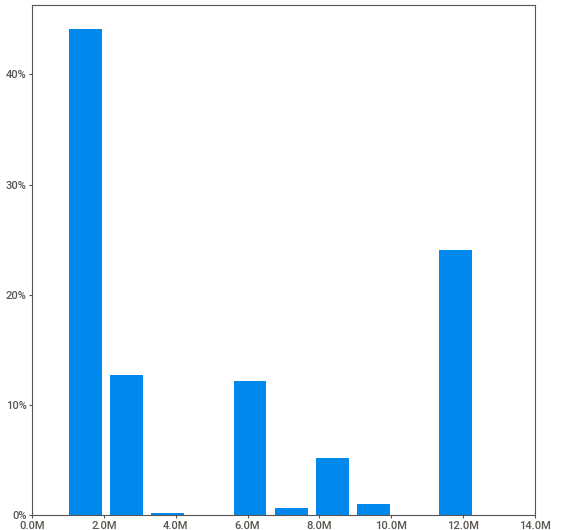
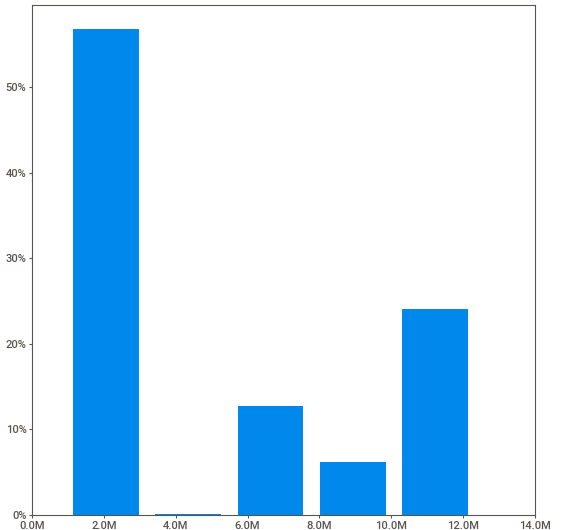
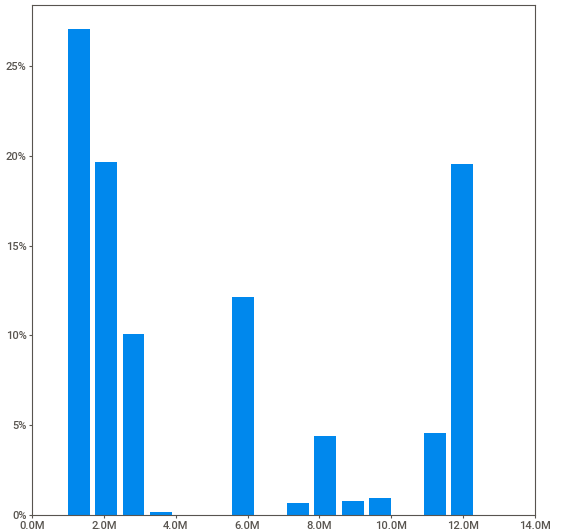
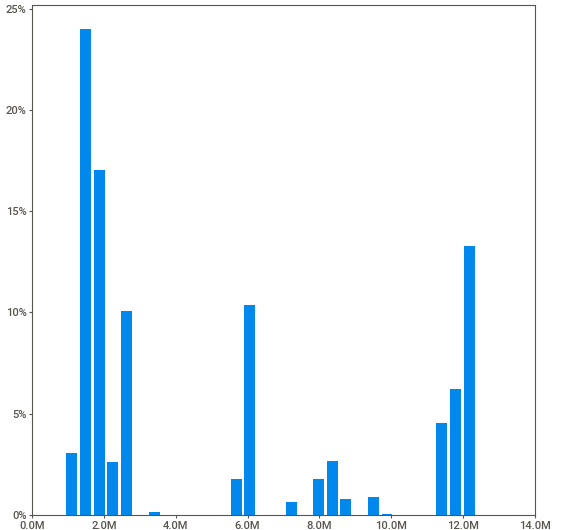
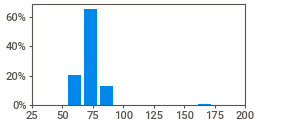
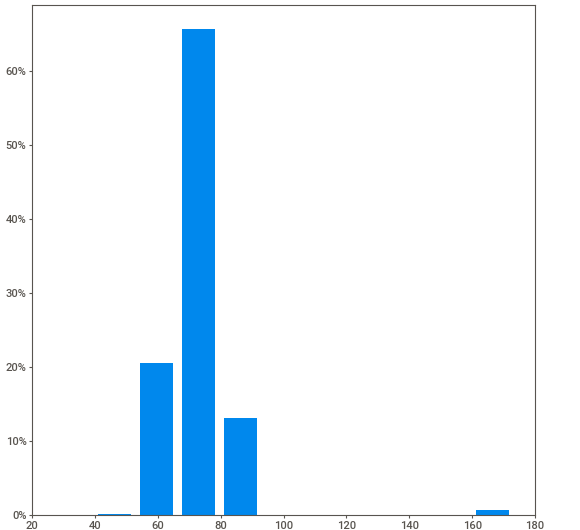
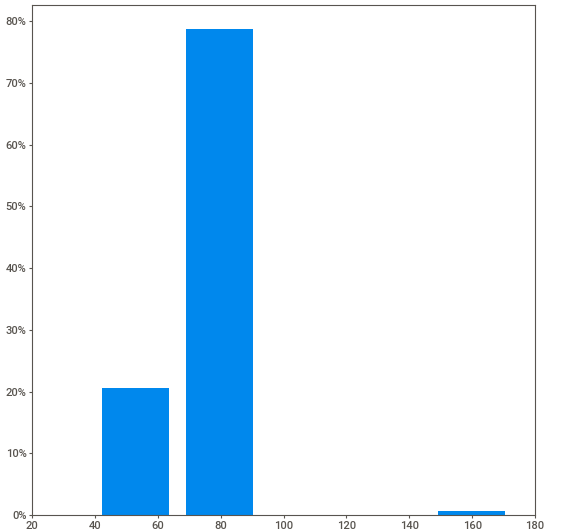
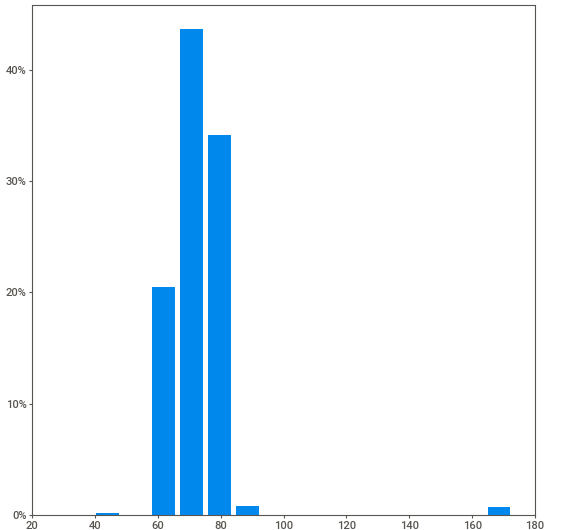
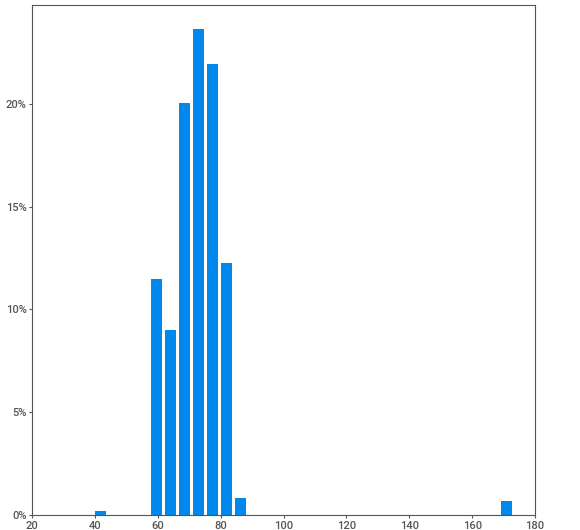
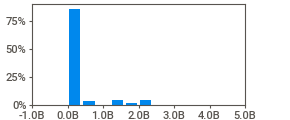
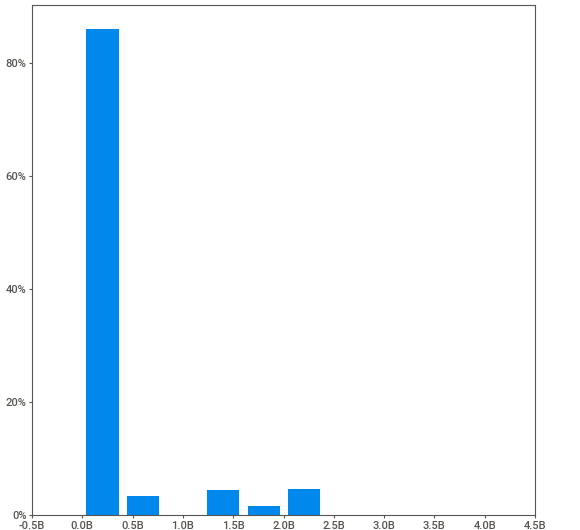
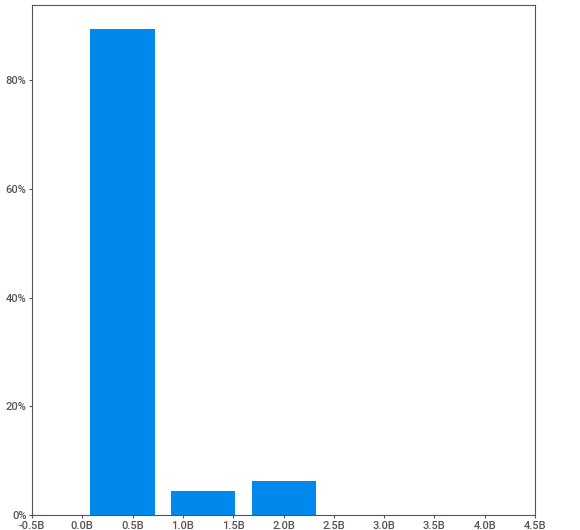
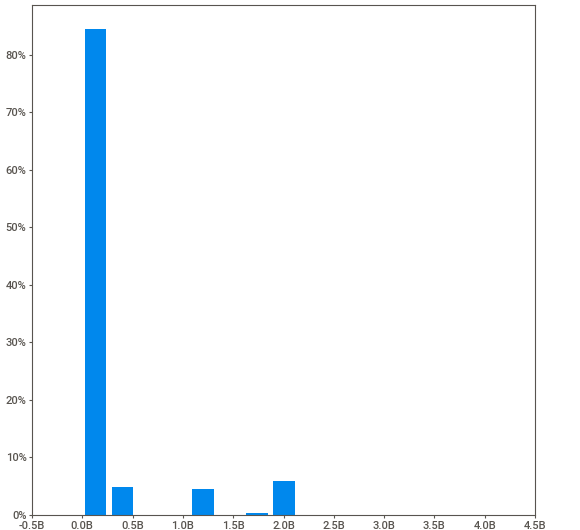
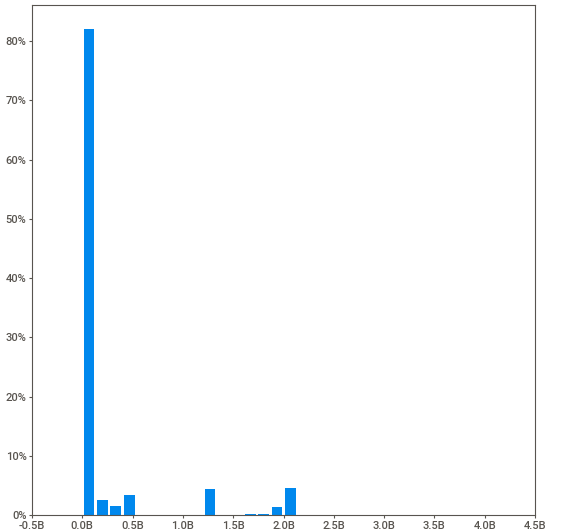
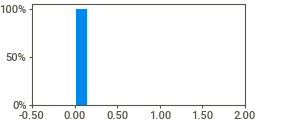
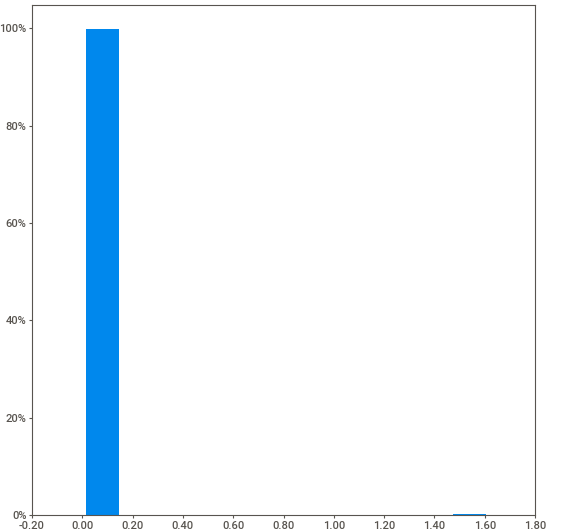
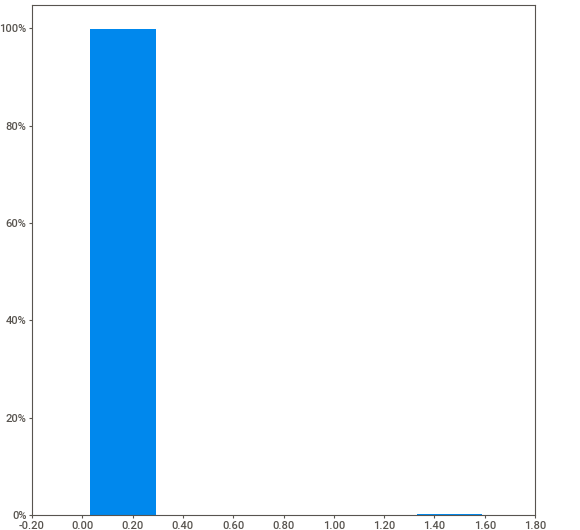
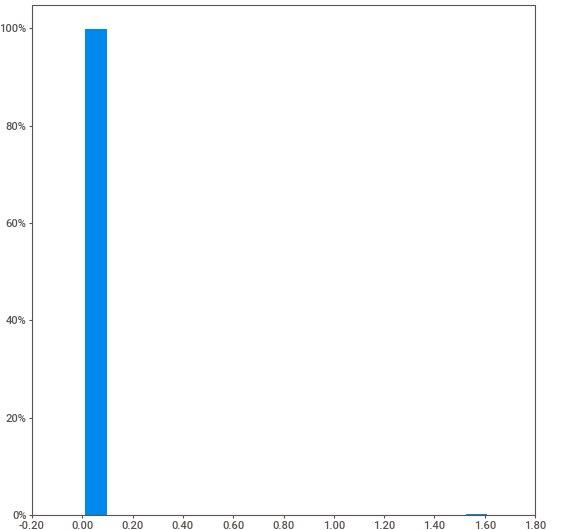
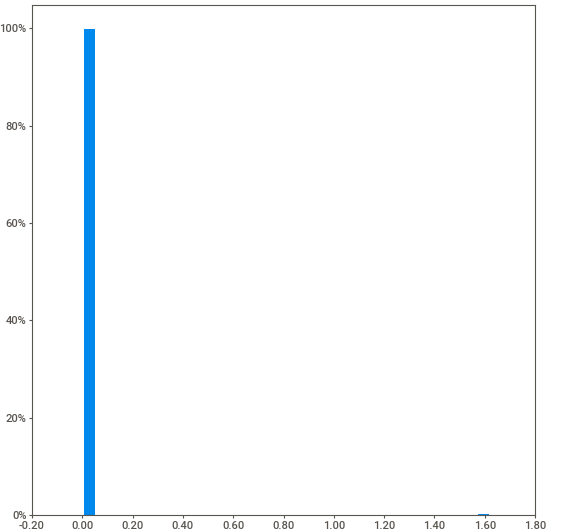
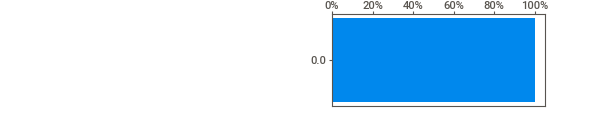
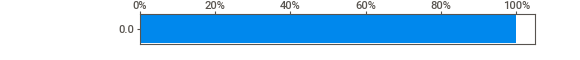
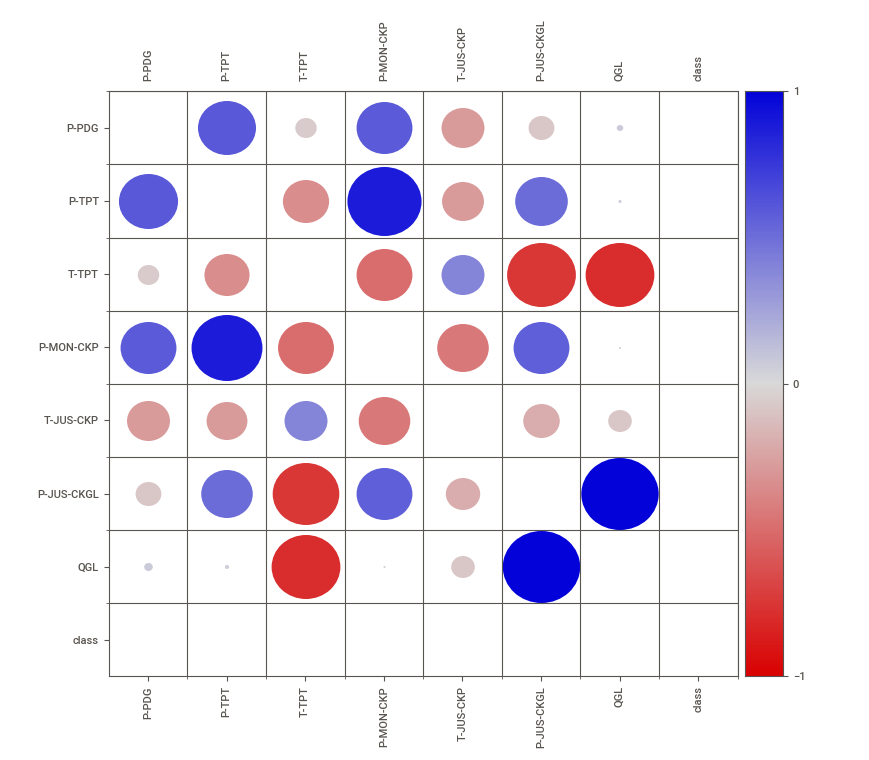
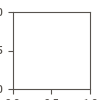

In [ ]:
sv.analyze(normal_frame).show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


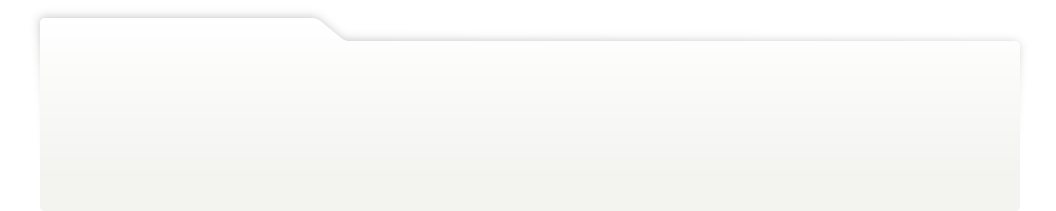
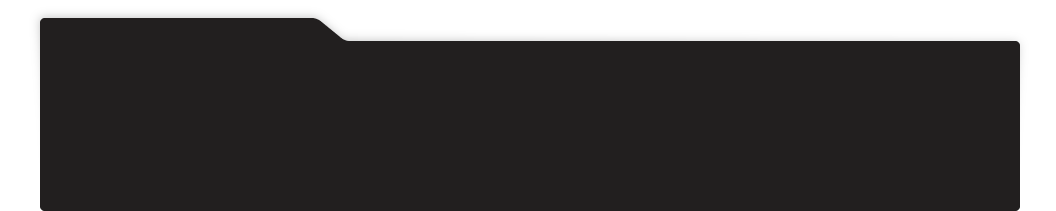
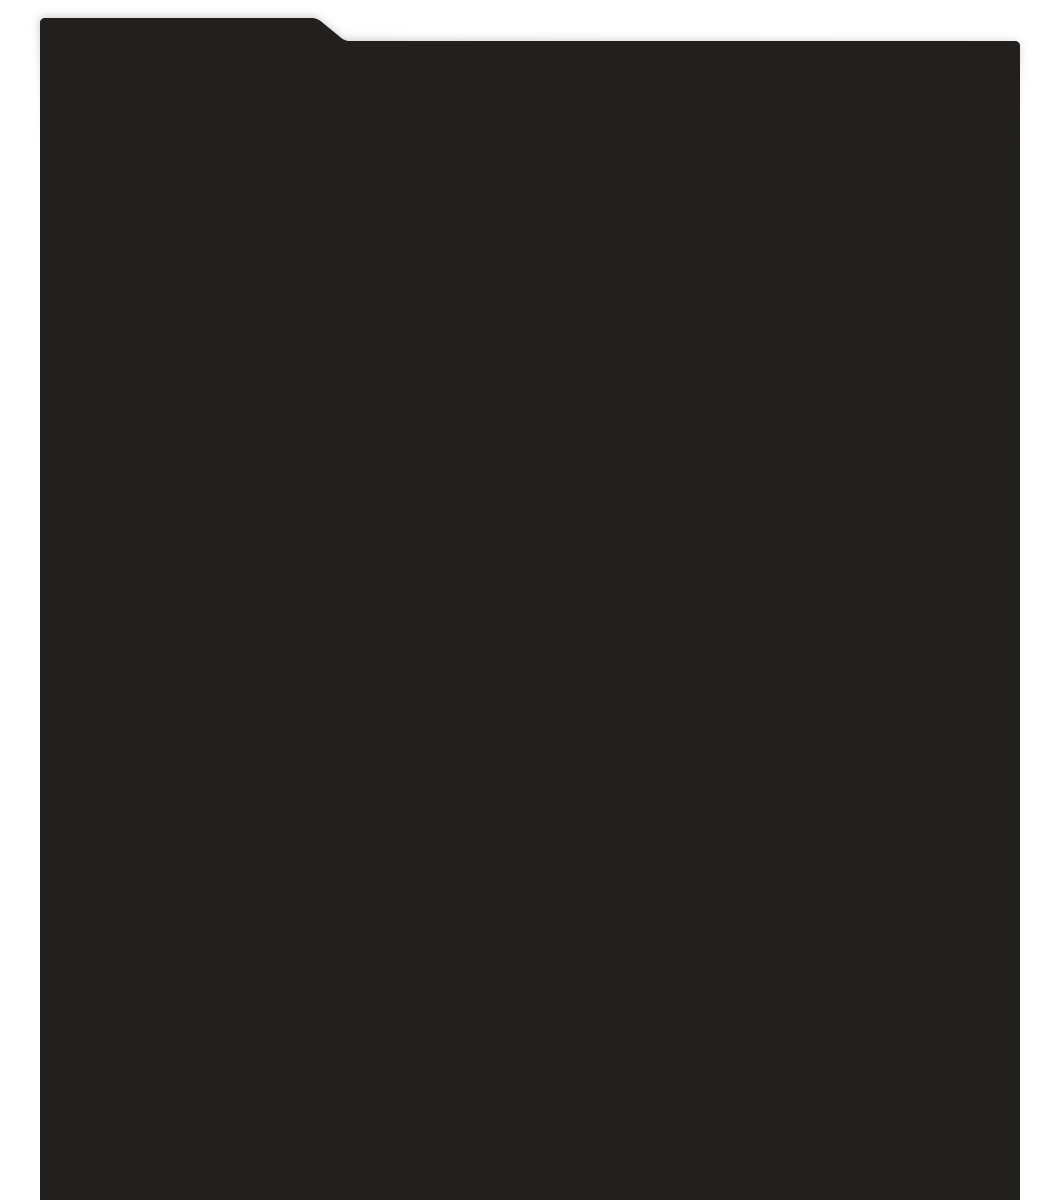
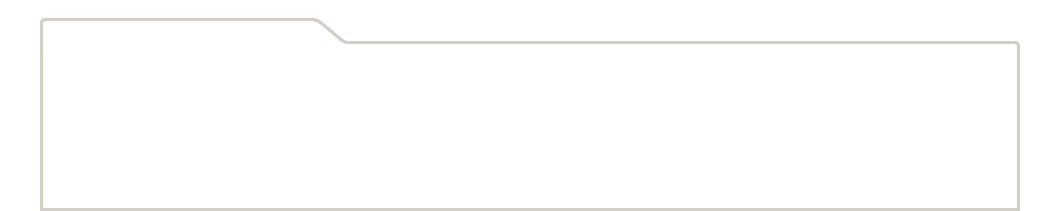
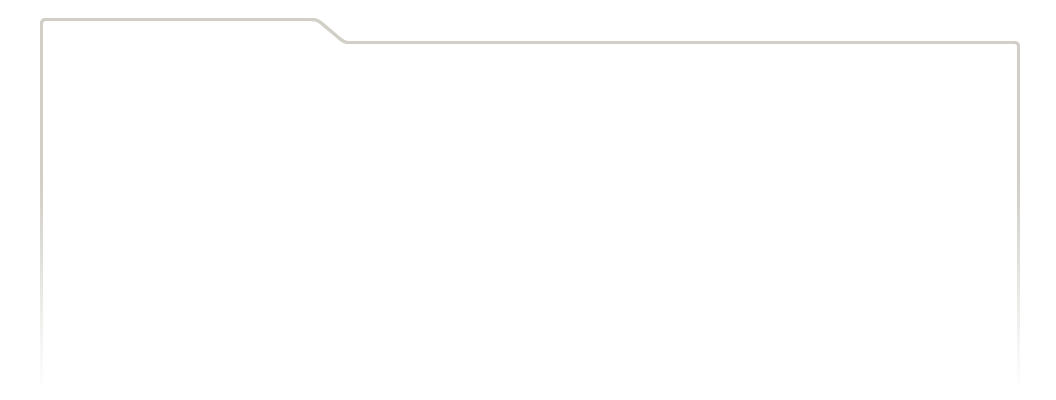
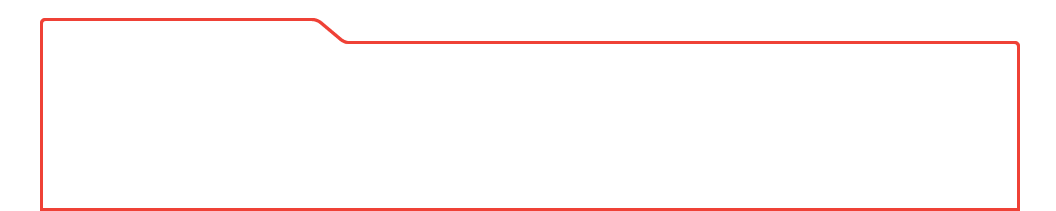
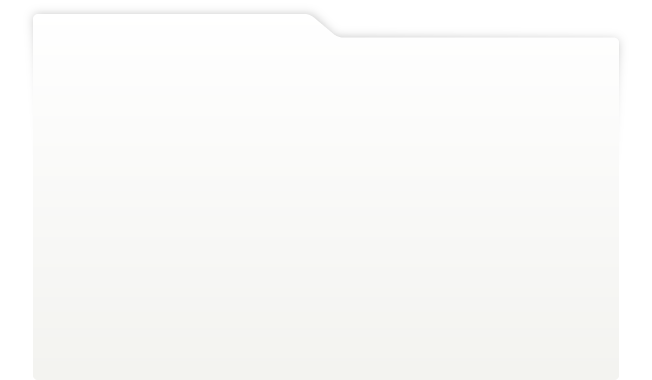
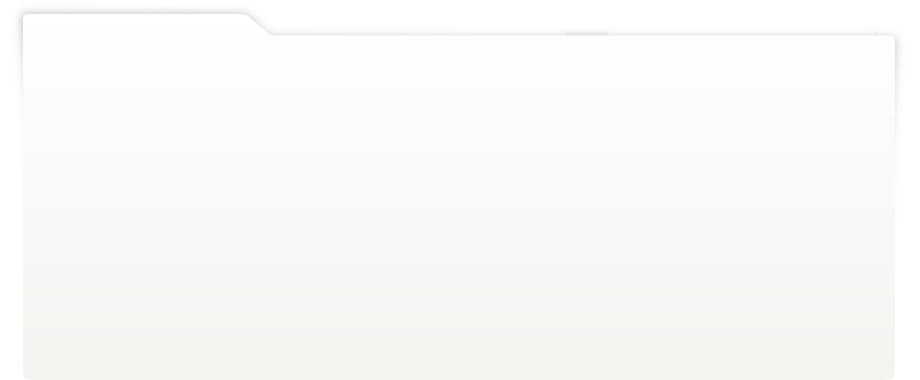
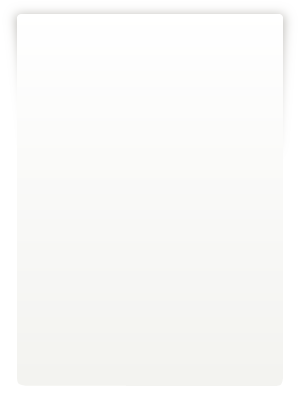
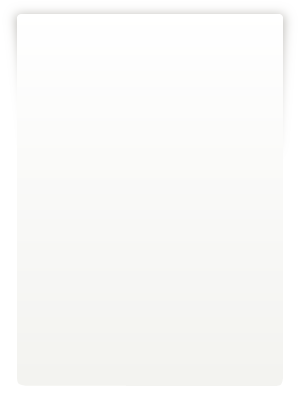
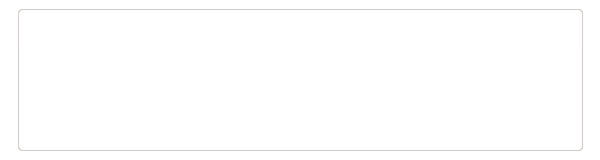
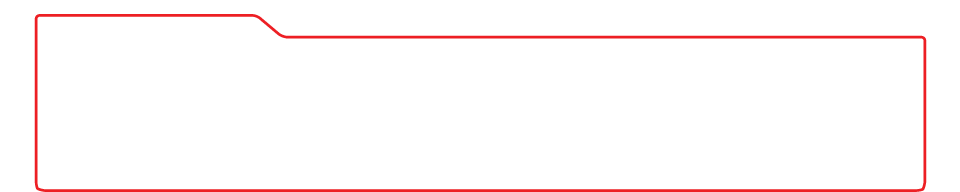
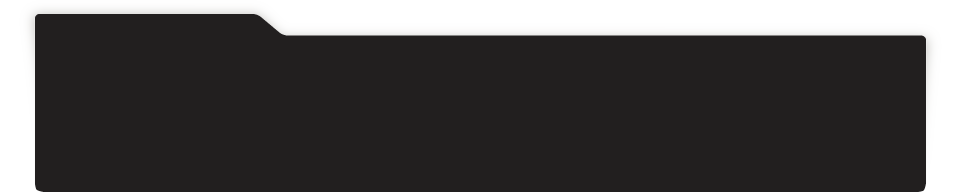
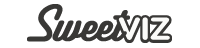
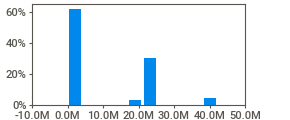
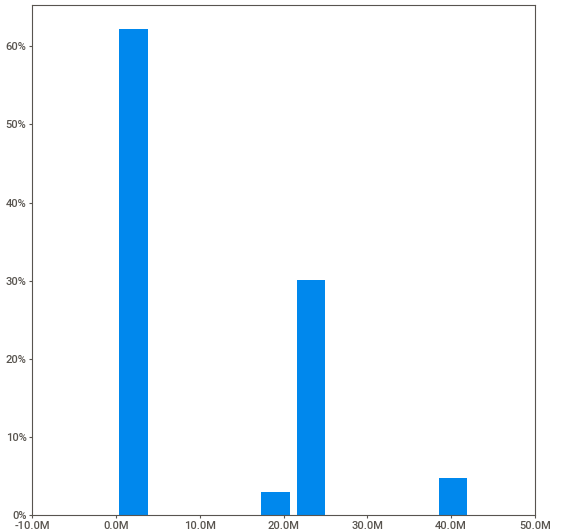
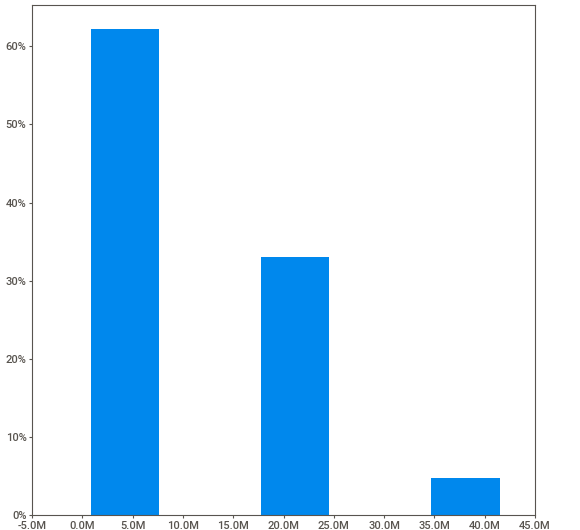
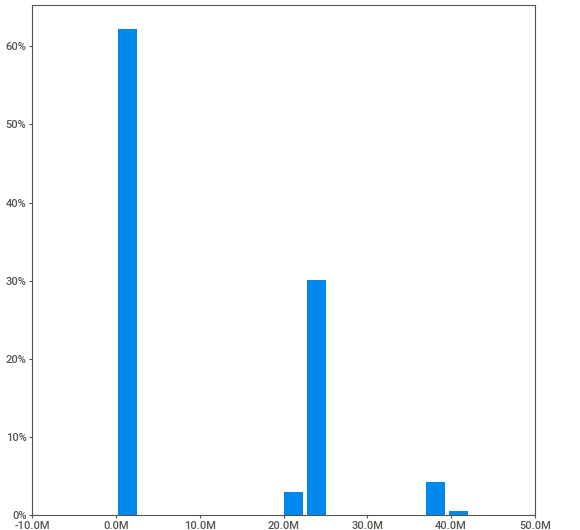
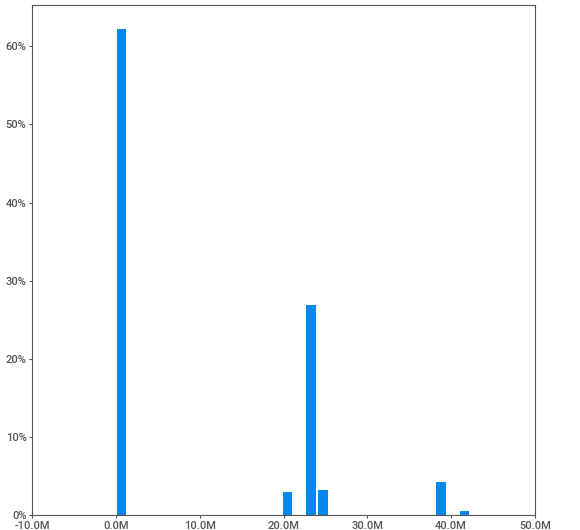
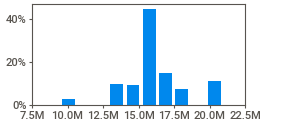
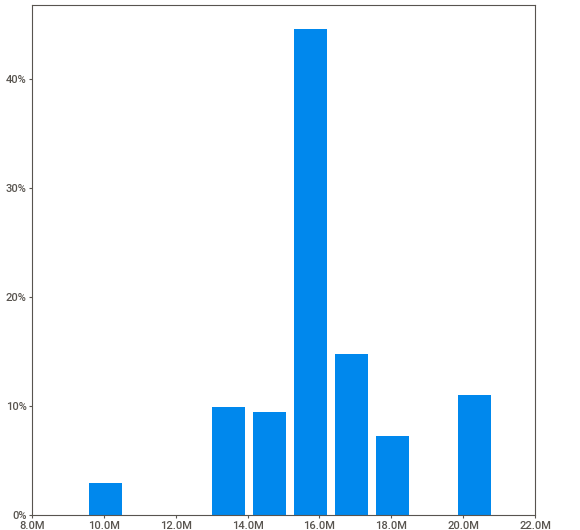
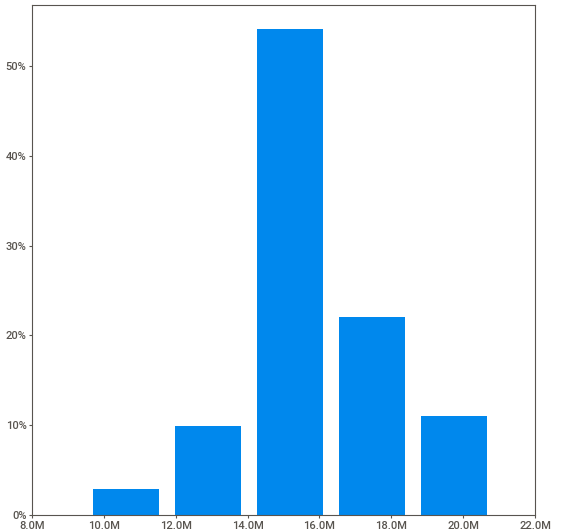
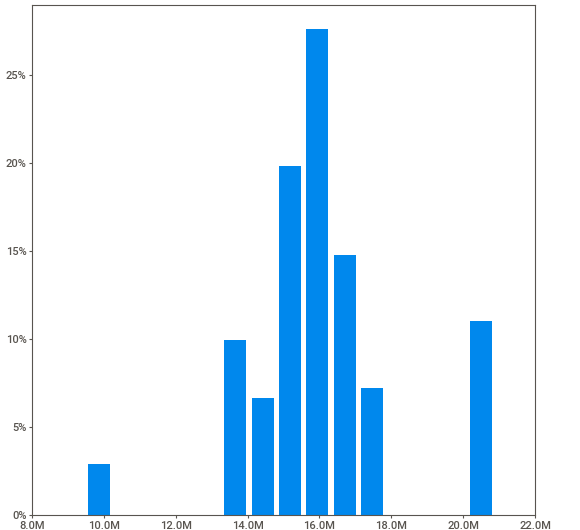
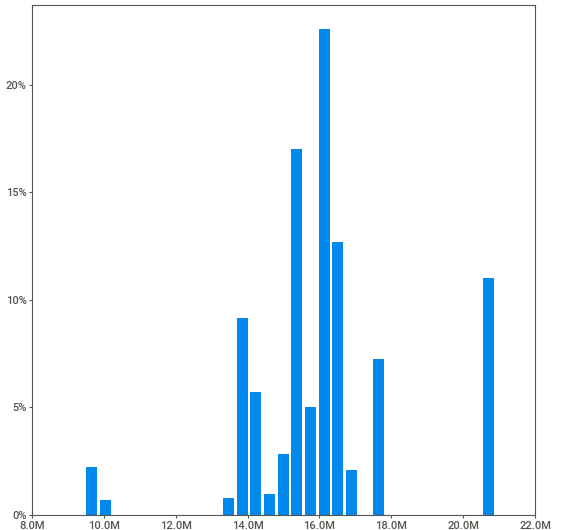
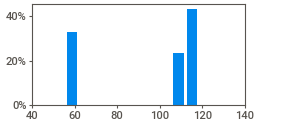
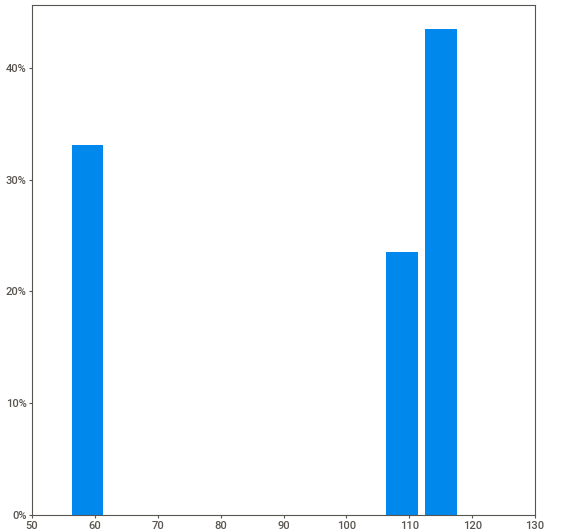
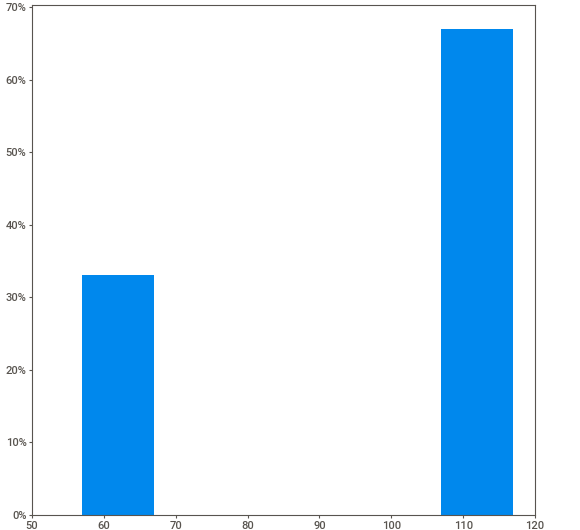
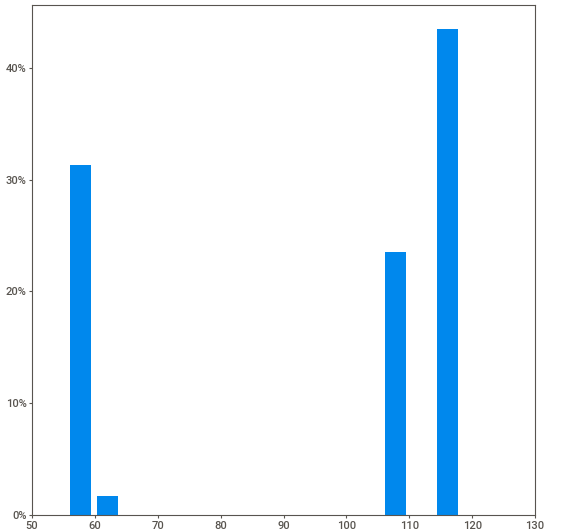
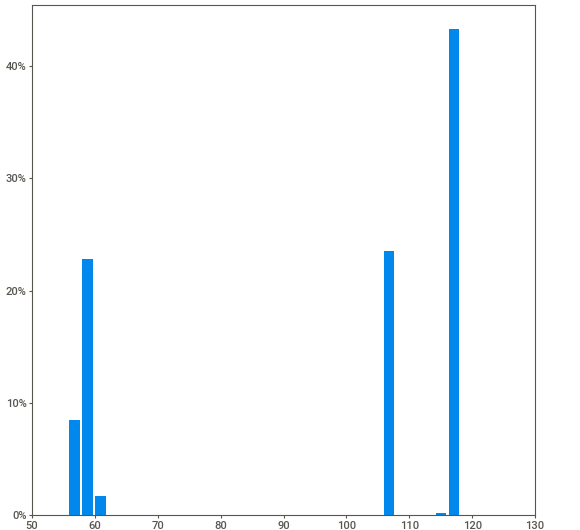
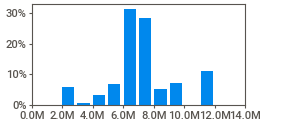
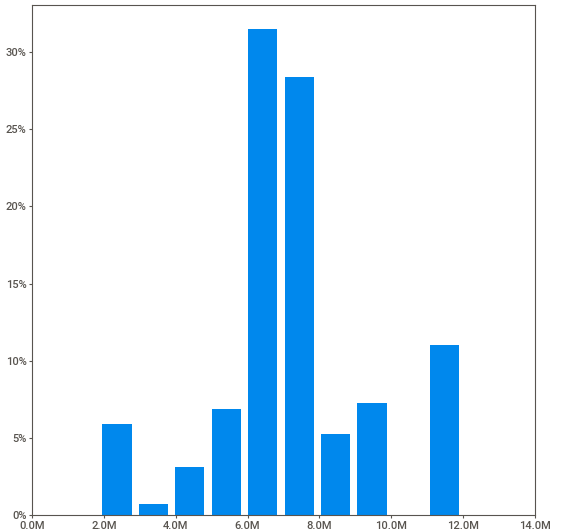
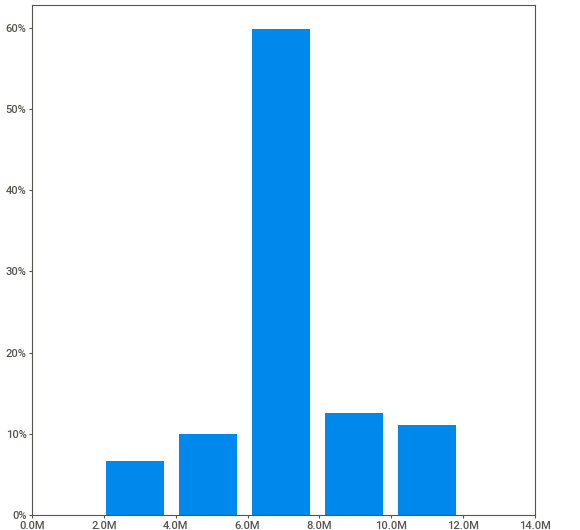
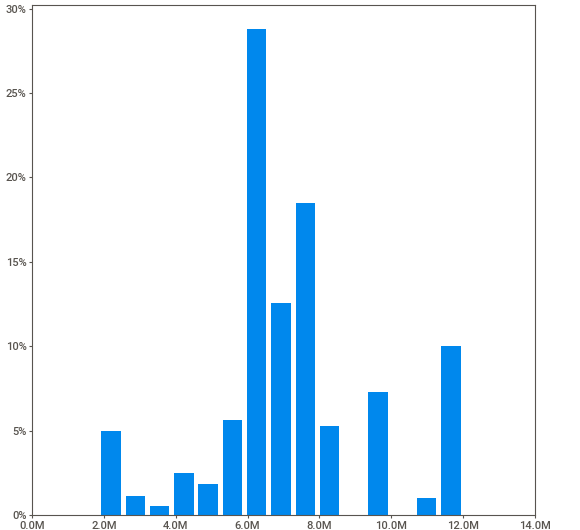
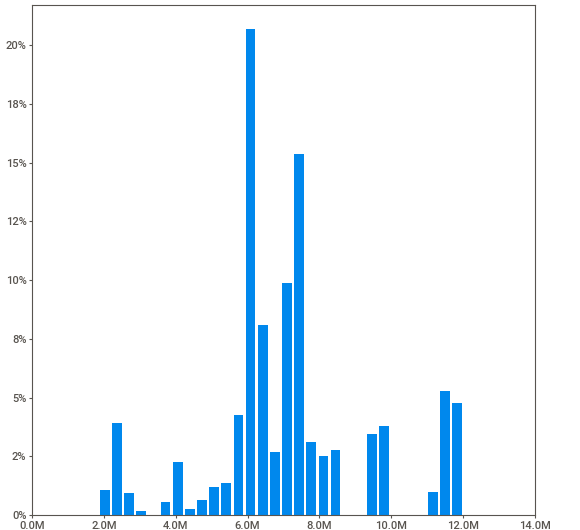
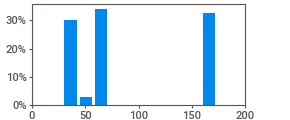
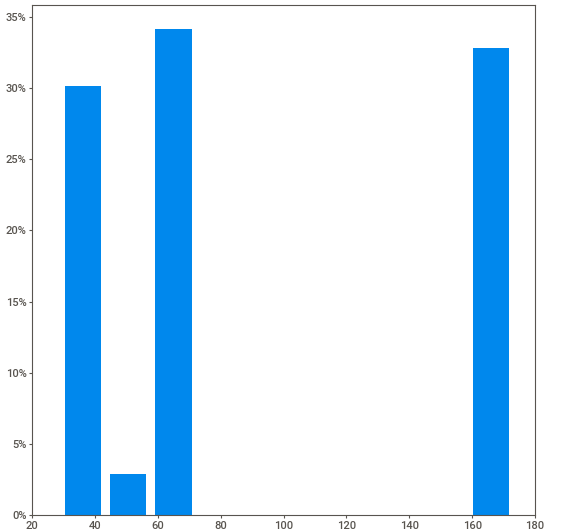
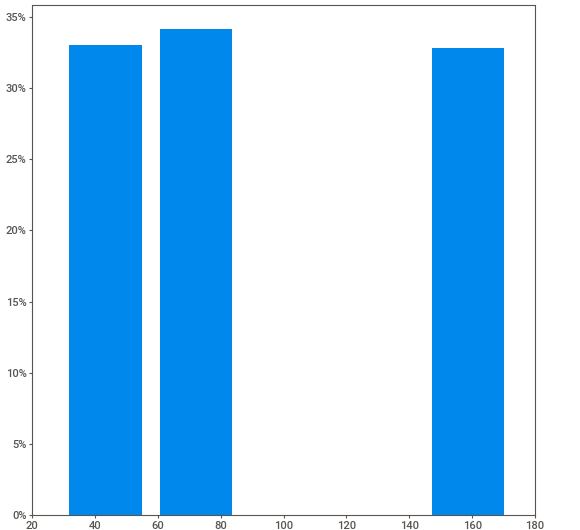
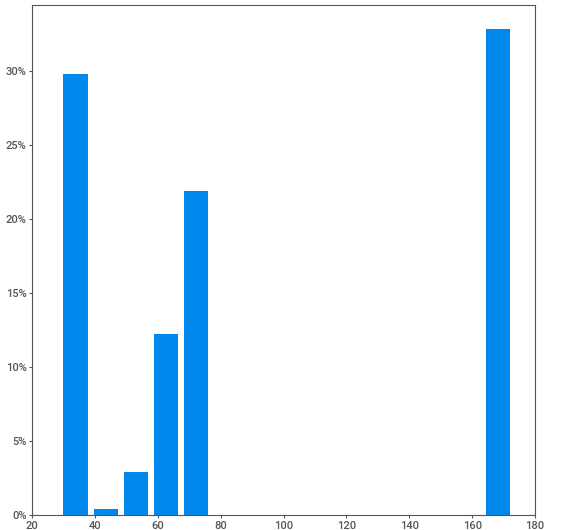
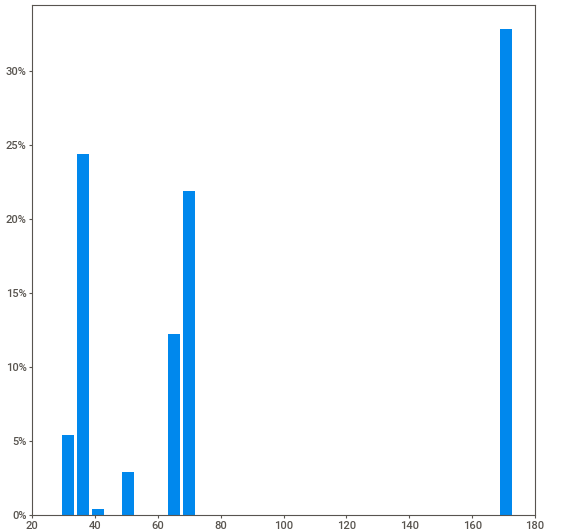
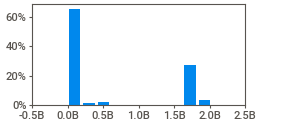
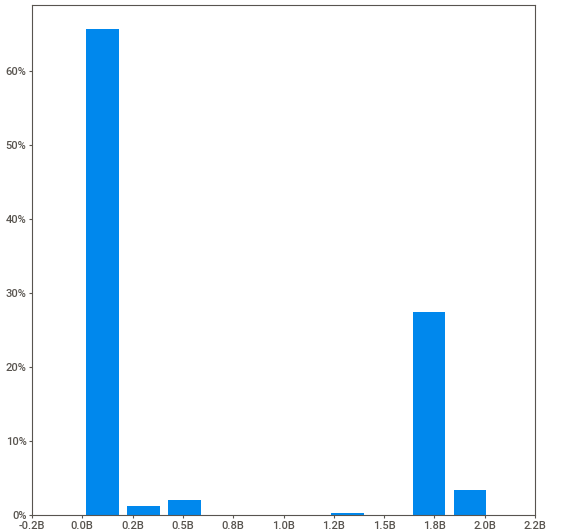
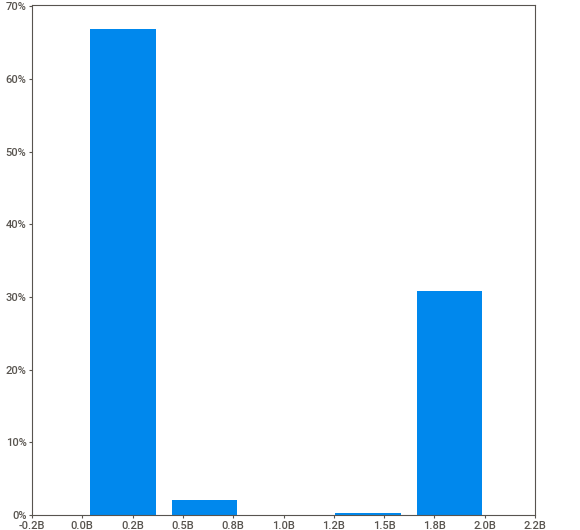
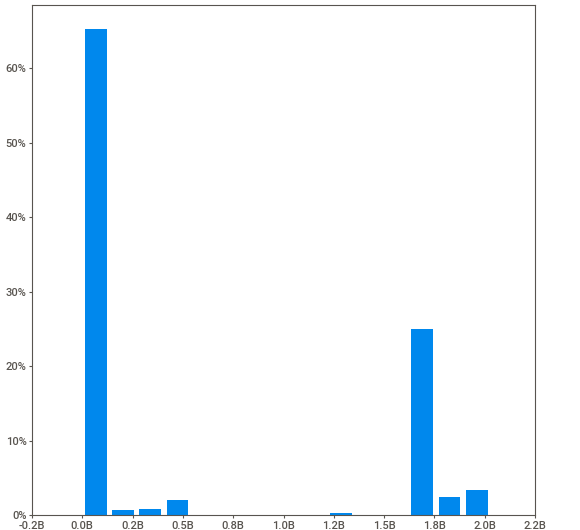
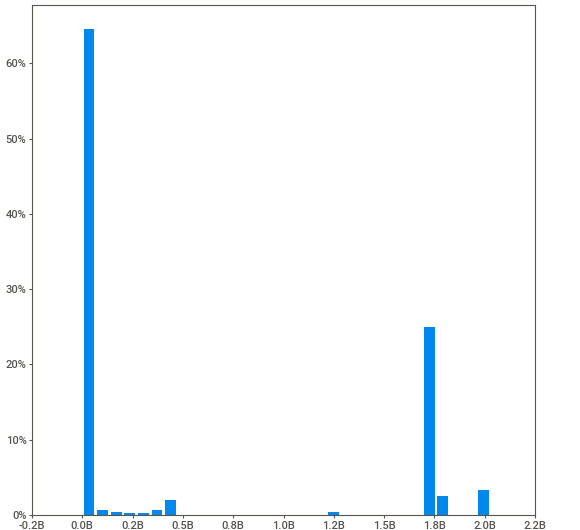
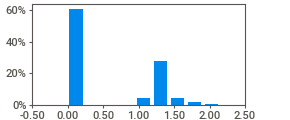
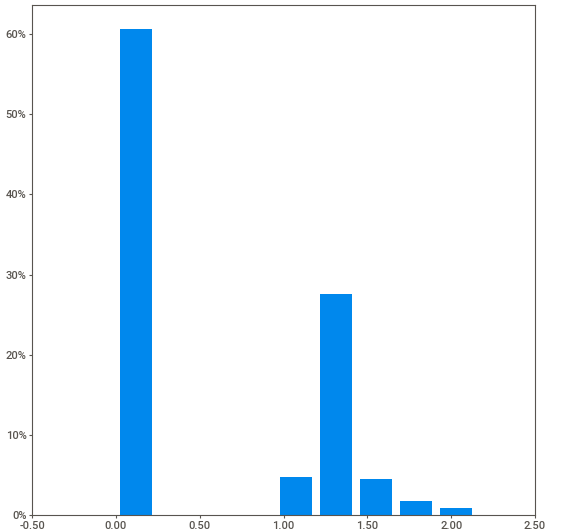
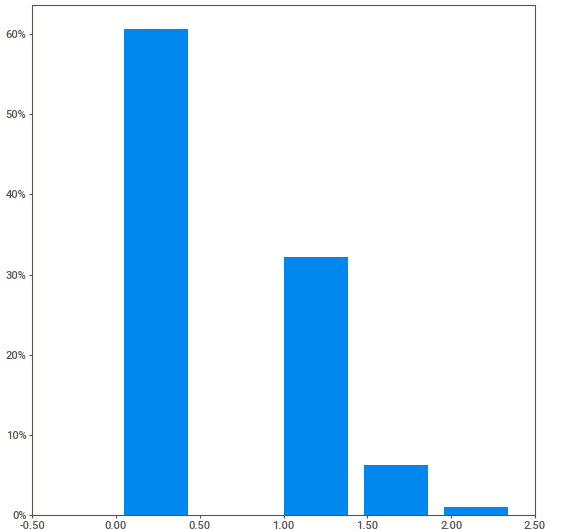
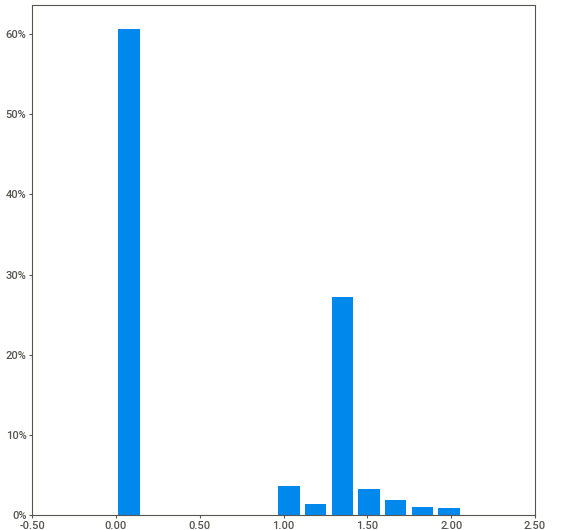
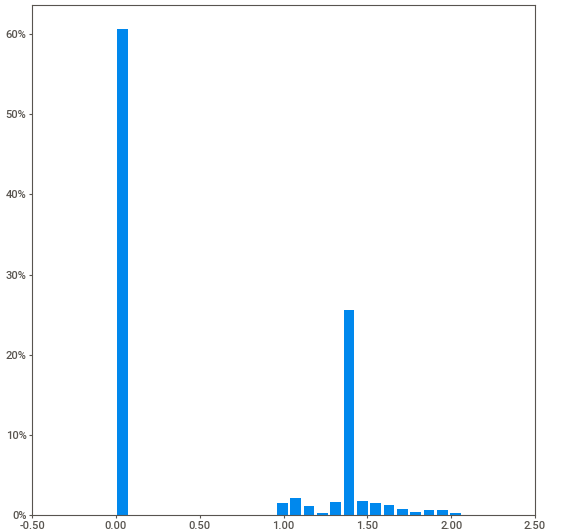
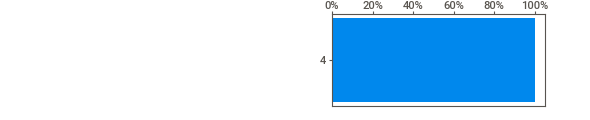
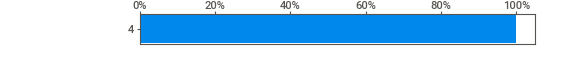
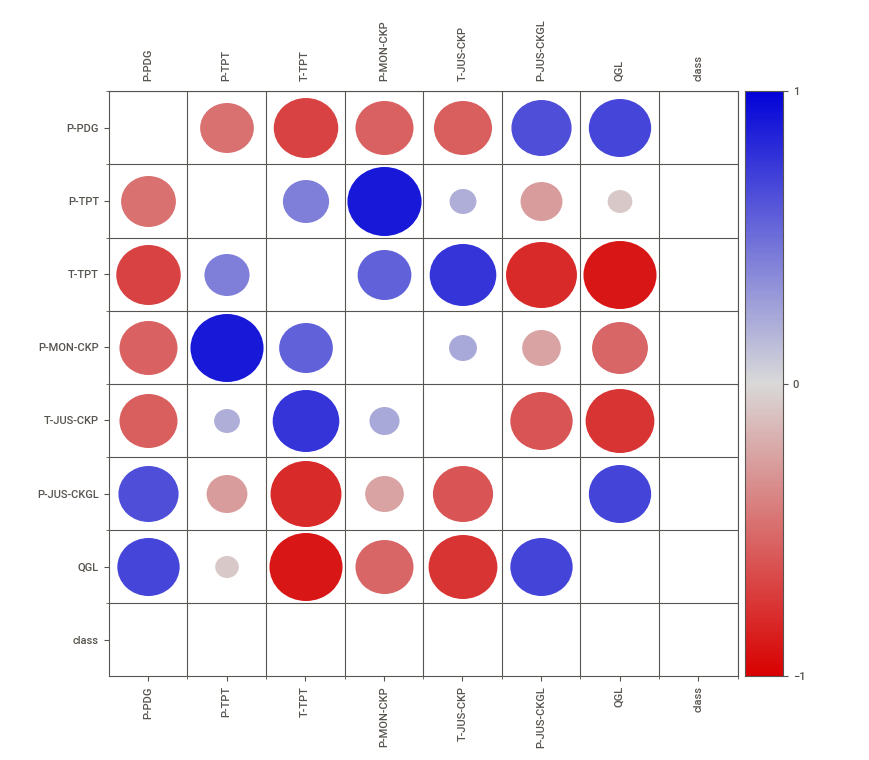
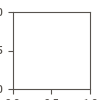

In [ ]:
sv.analyze(flow_instability_frame).show_notebook()

### Normalização dos Dados

In [ ]:
scaler_min_max = MinMaxScaler()

In [ ]:
df = pd.concat([normal_frame, flow_instability_frame])

In [ ]:
df_normalized = pd.DataFrame(scaler_min_max.fit_transform(df), columns=df.columns)
df_normalized['class'].value_counts()

class
0.0    9439612
1.0    2462076
Name: count, dtype: int64

Após normalização dos dados, as observações com valor 0 continuam representando a classe Normal e as observações de anomalia são agora representadas pelo valor 1.

                                             |          | [  0%]   00:00 -> (? left)


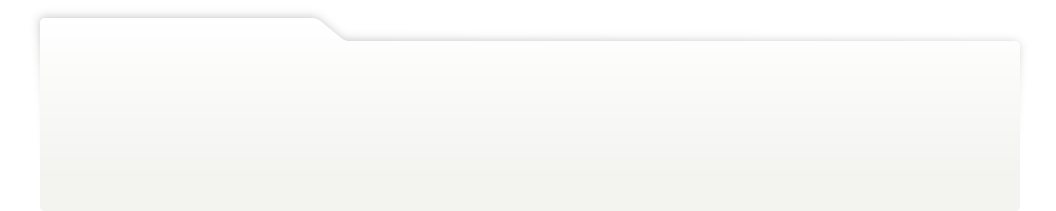
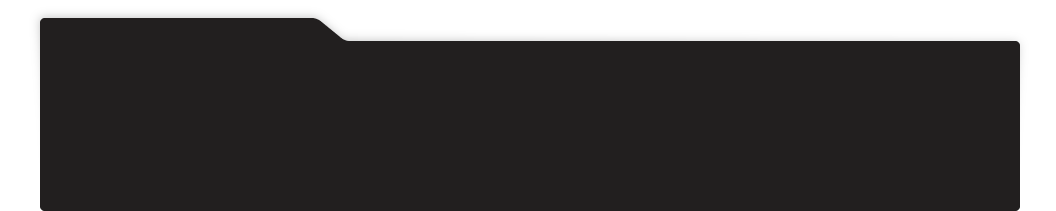
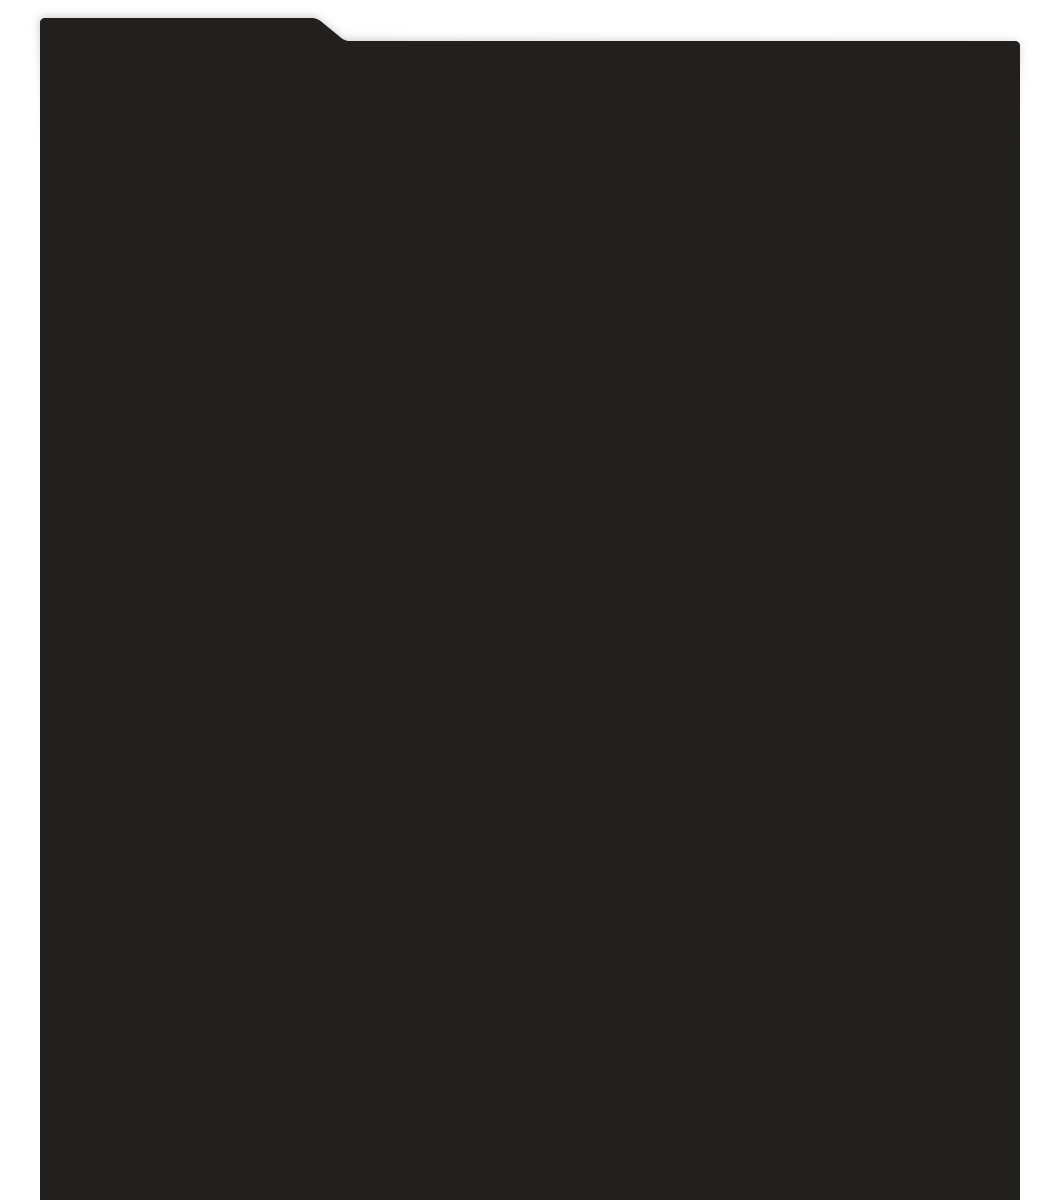
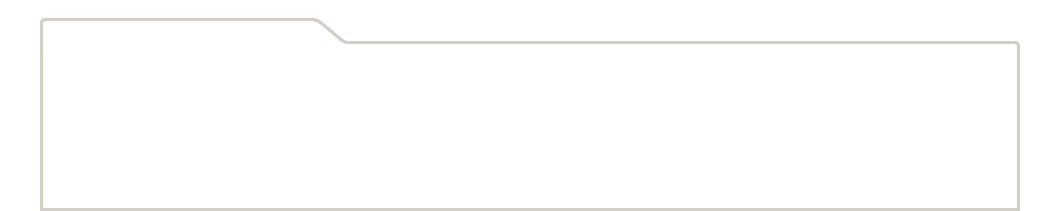
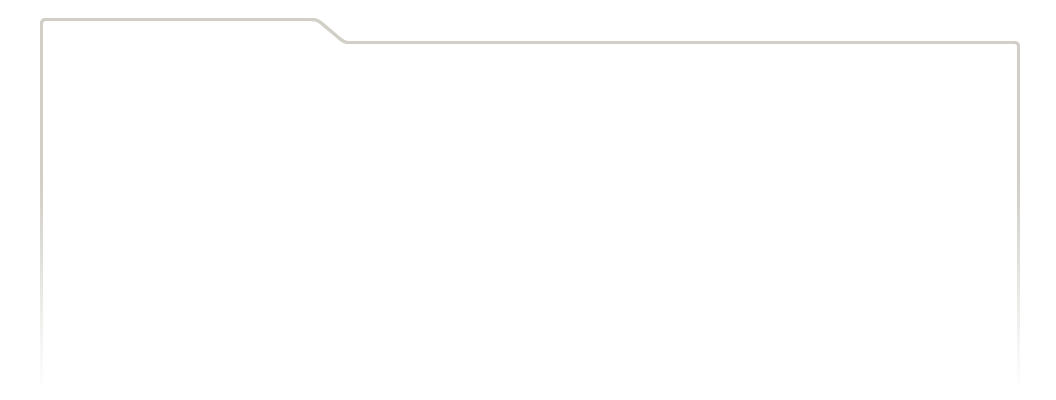
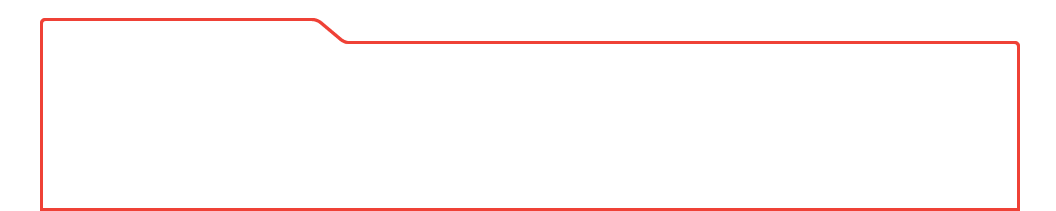
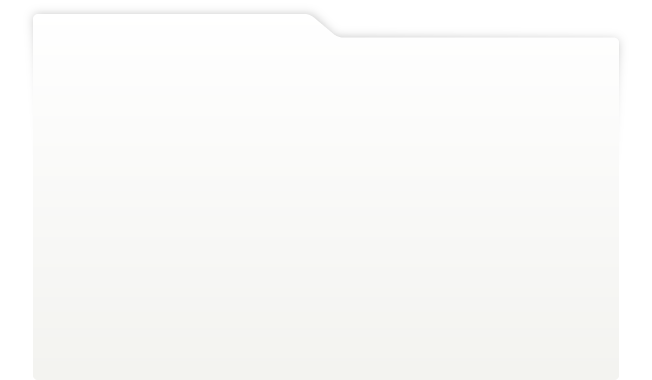
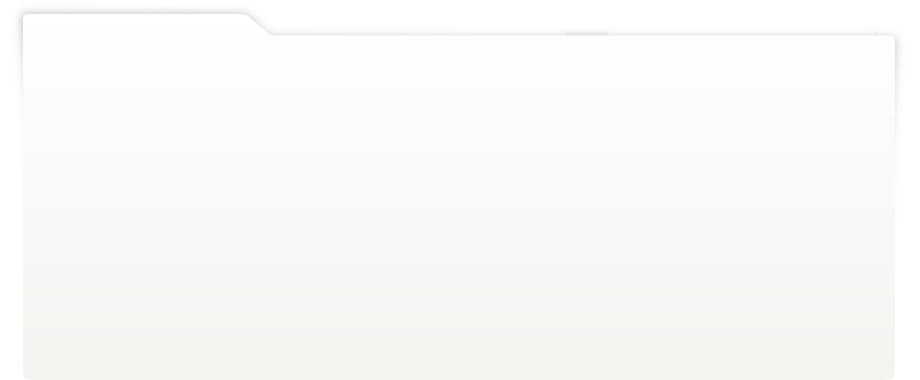
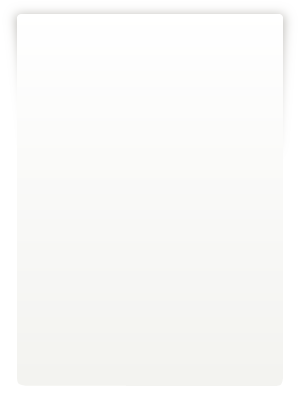
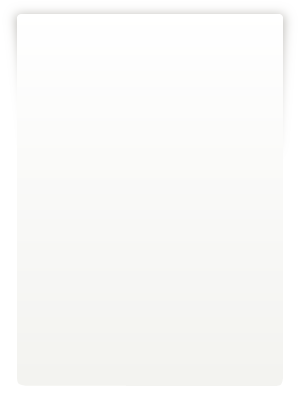
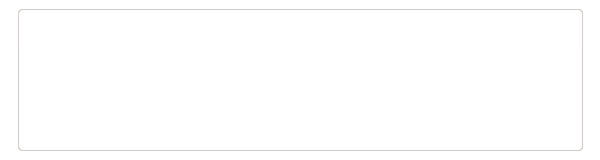
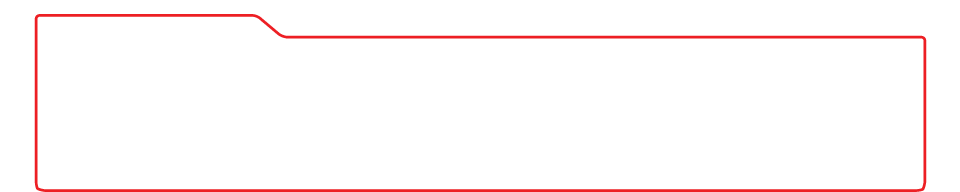
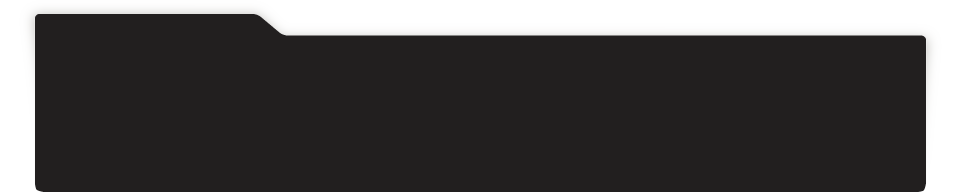
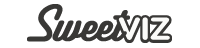
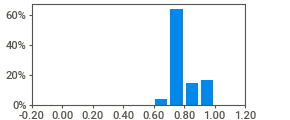
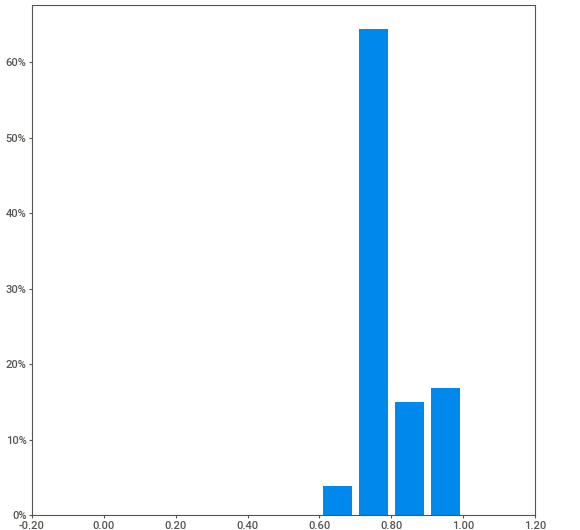
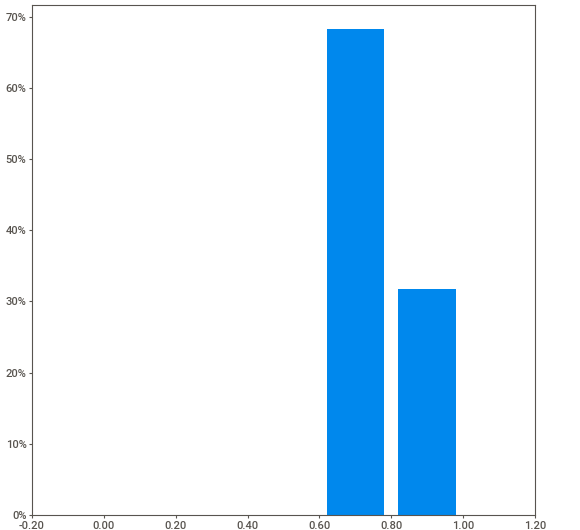
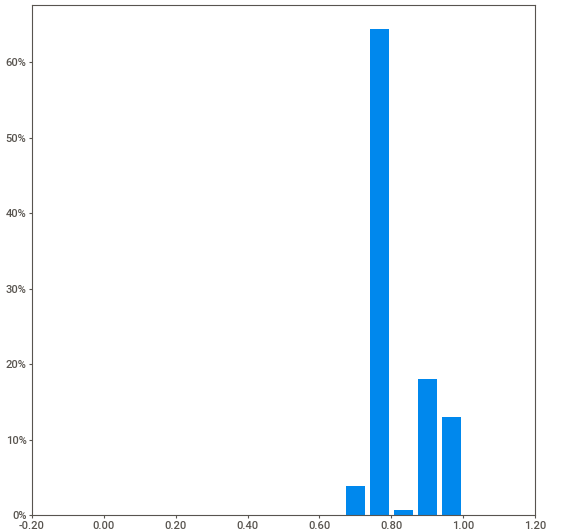
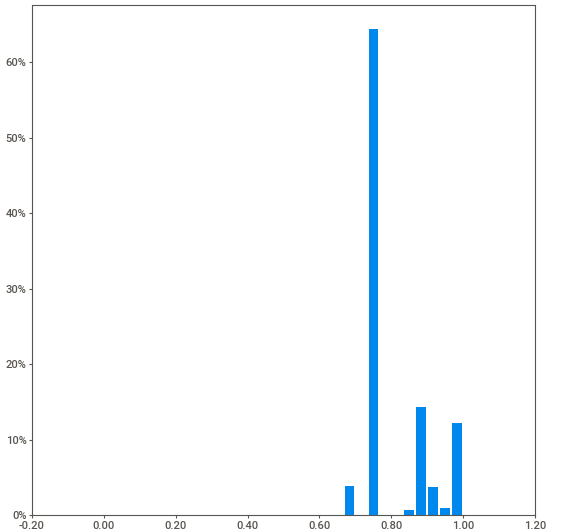
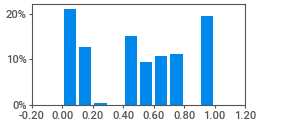
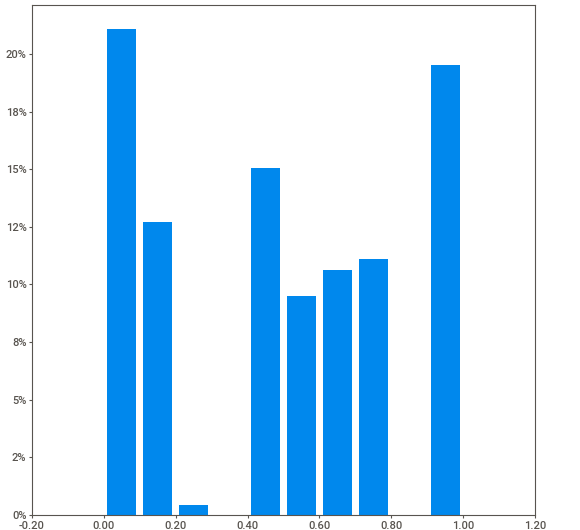
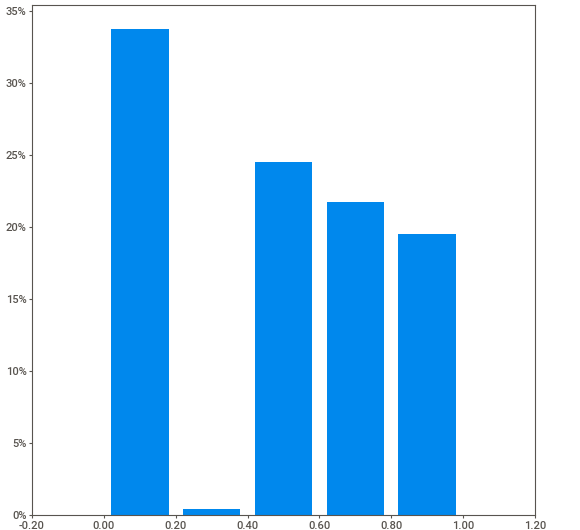
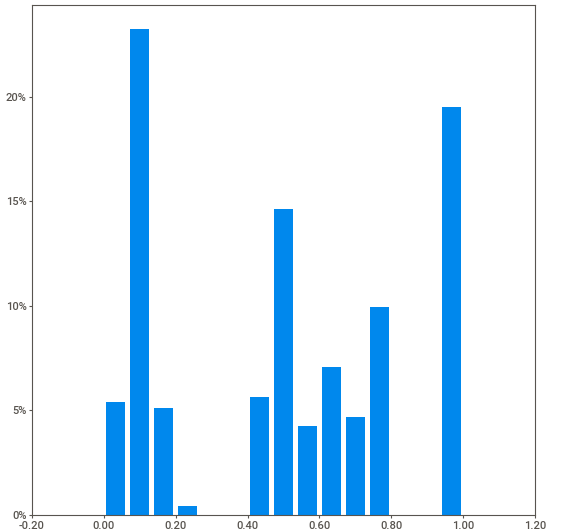
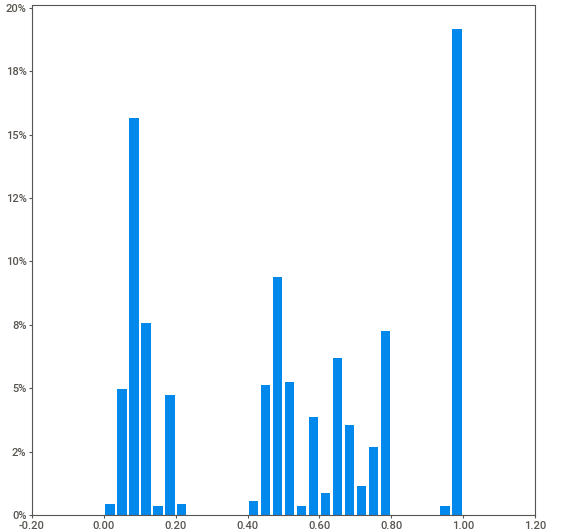
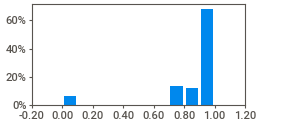
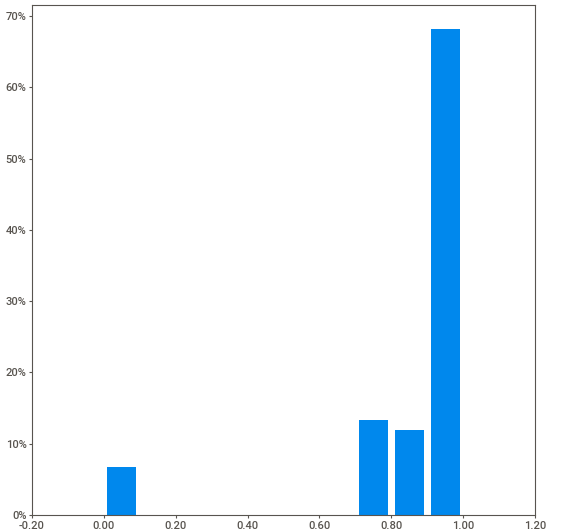
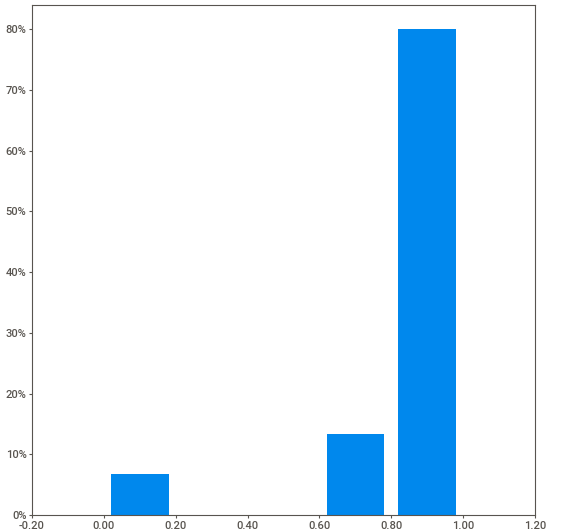
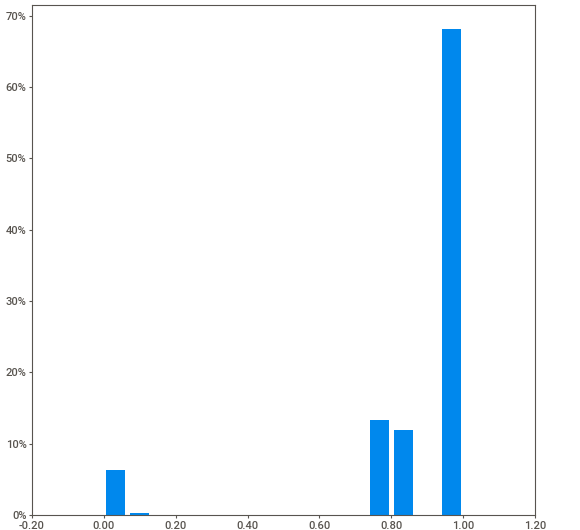
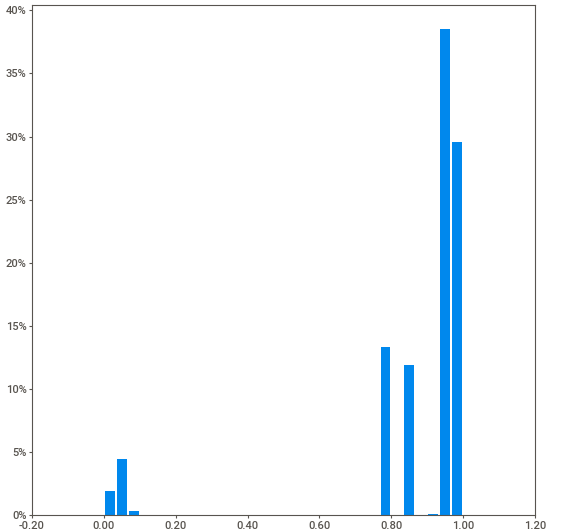
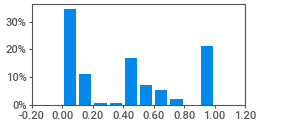
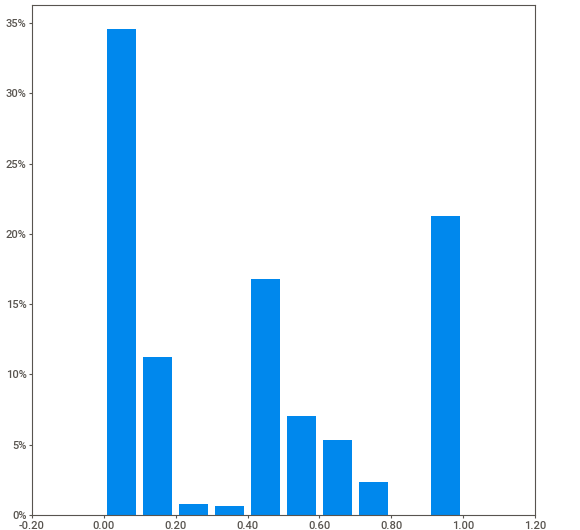
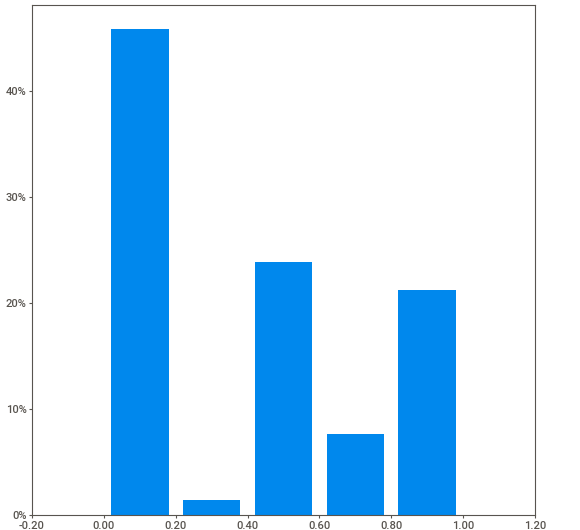
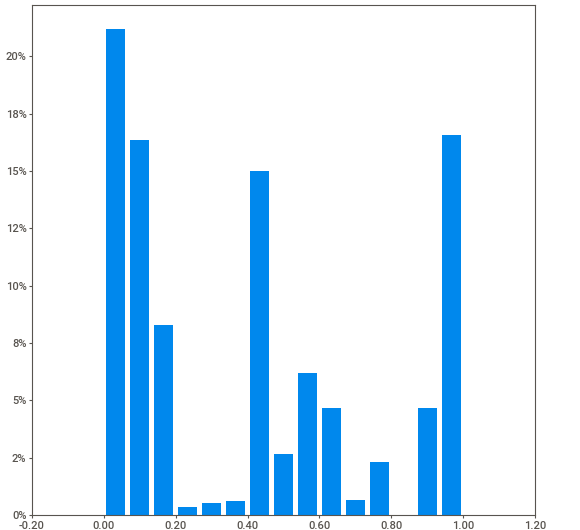
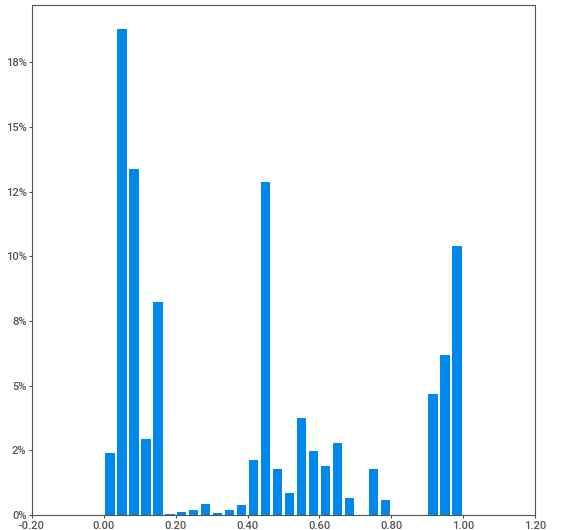
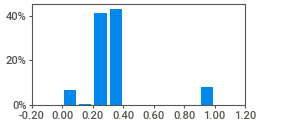
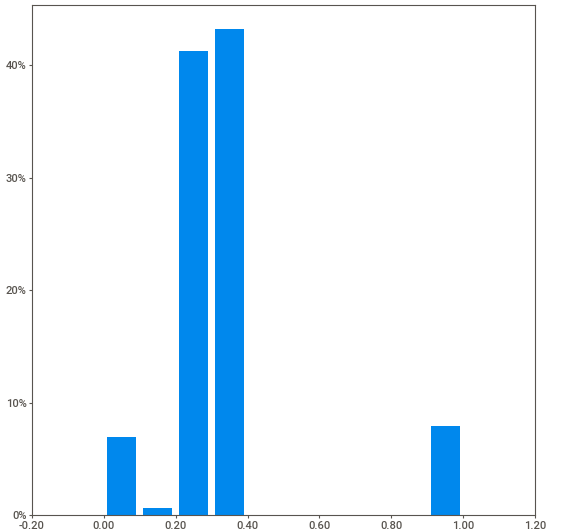
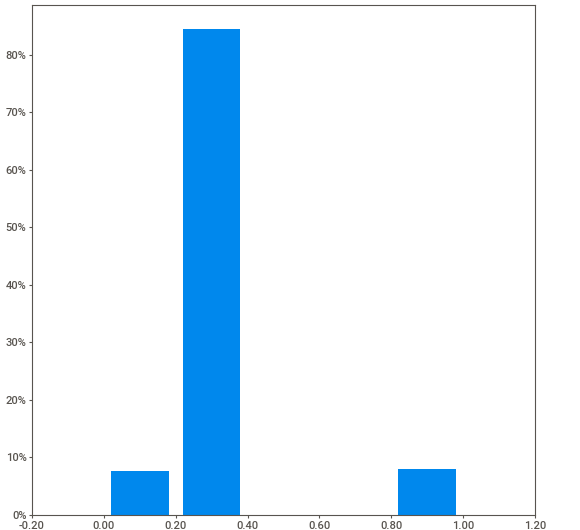
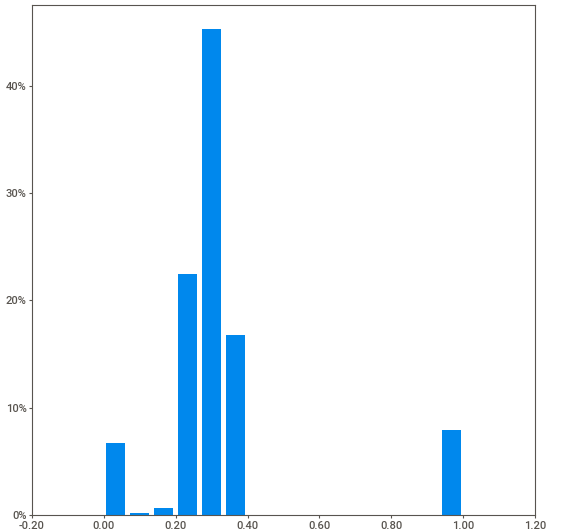
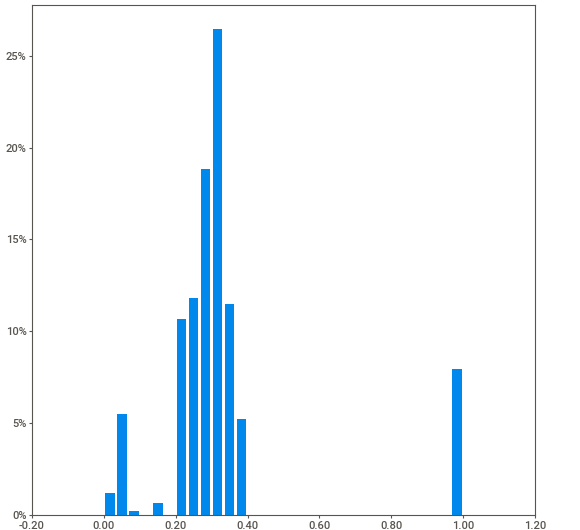
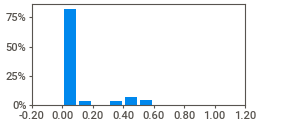
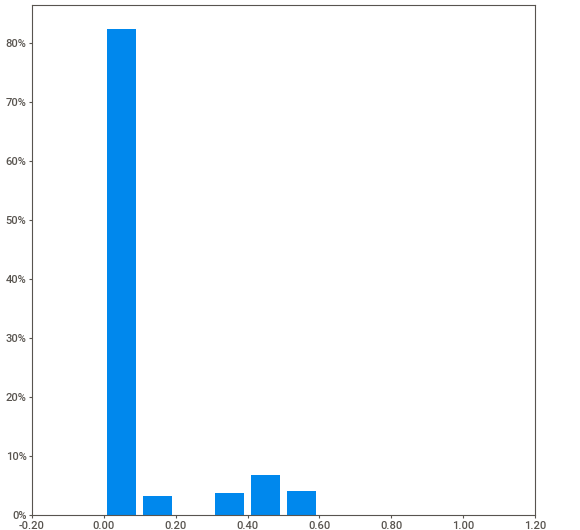
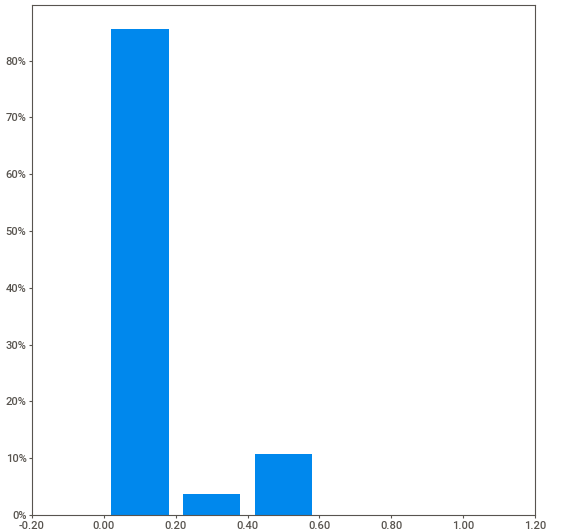
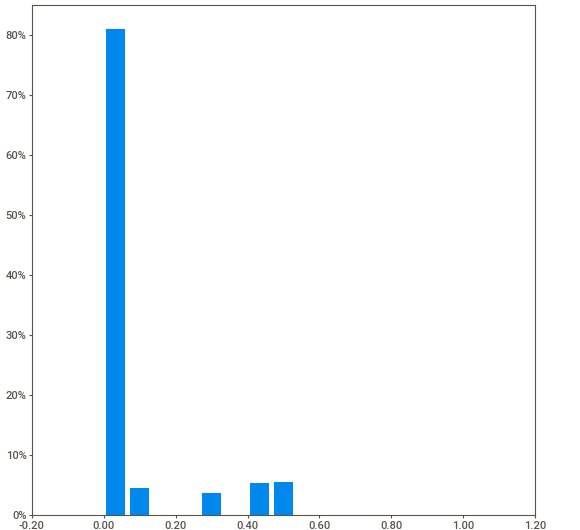
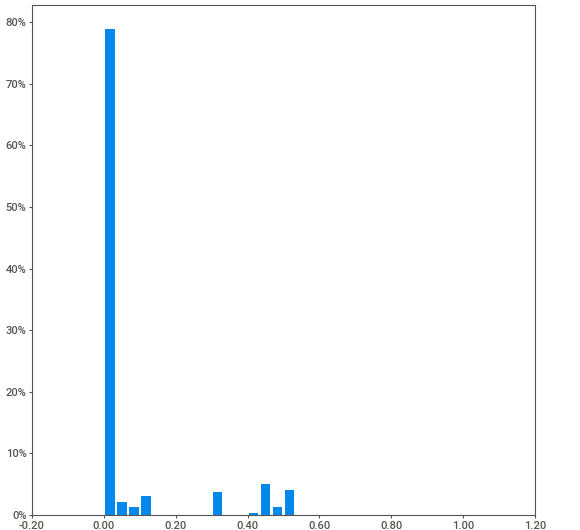
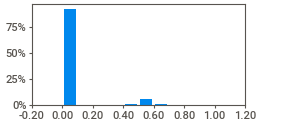
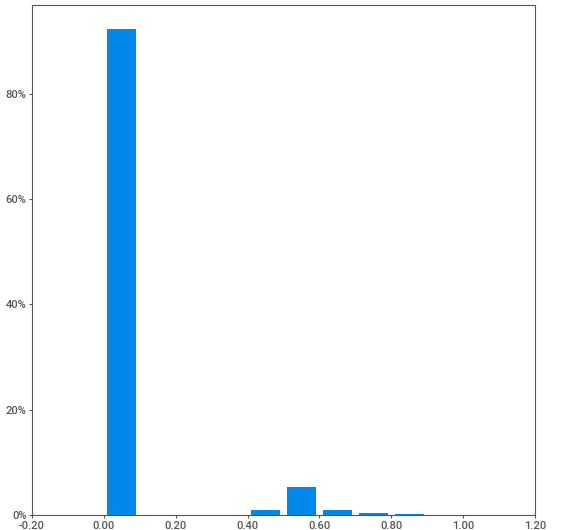
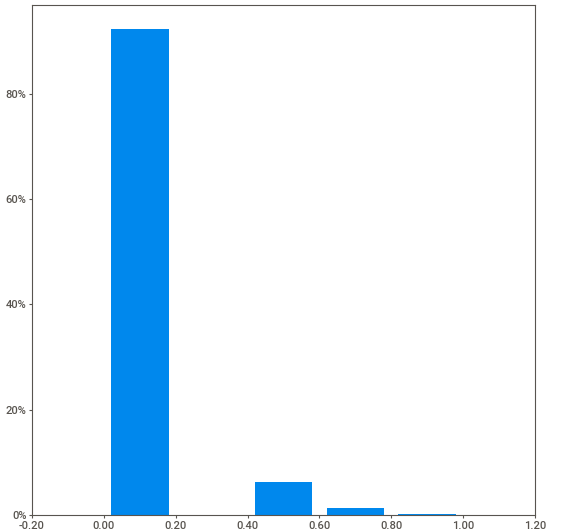
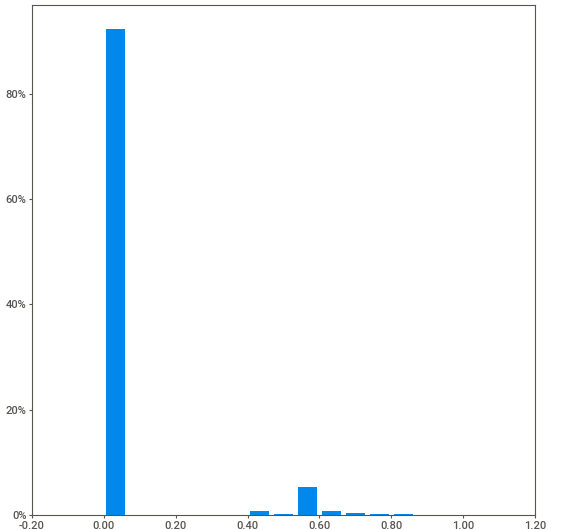
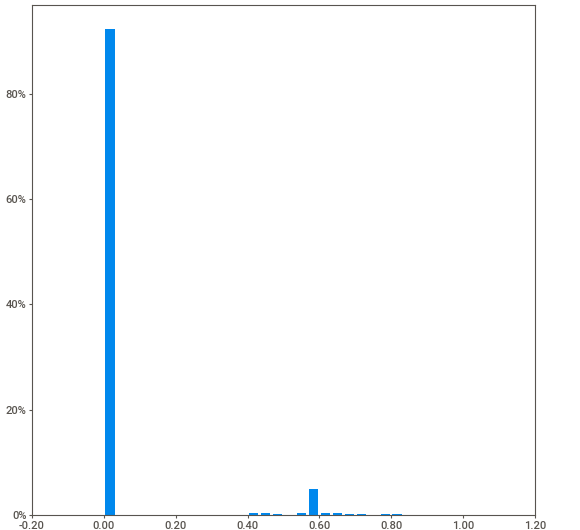
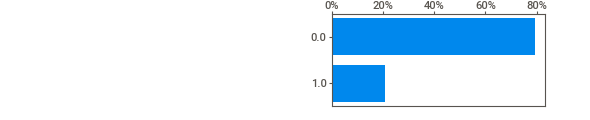
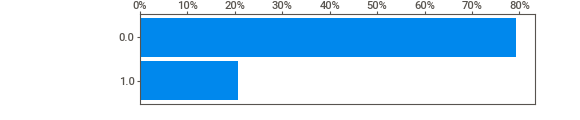
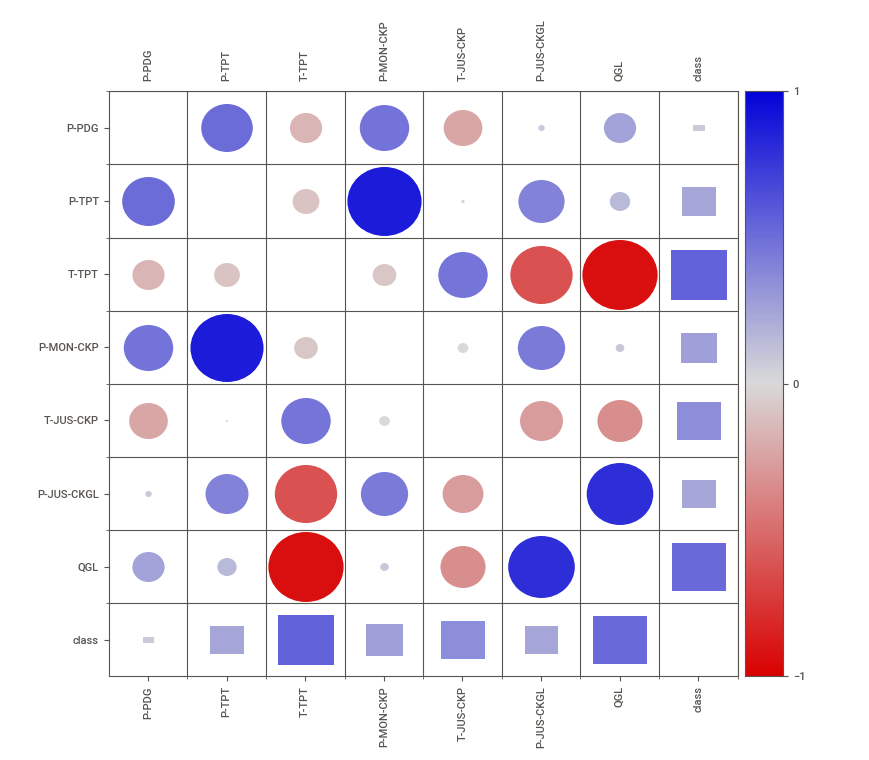
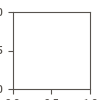

In [ ]:
sv.analyze(df_normalized).show_notebook()

### Definição dos classificadores e pré-processamento dos dados

In [ ]:
names = [
    "Random Forest",
    "Naive Bayes",
    "Nearest Neighbors"
]

classifiers = [
    RandomForestClassifier(
        max_depth=8, n_estimators=100, max_features=2, random_state=666
    ),
    GaussianNB(),
    KNeighborsClassifier(2)
]

In [ ]:
# observações sem classificação definida serão descartadas
df_normalized.dropna(subset=['class'], inplace=True)

In [ ]:
# observações faltantes no restante dos atributos serão definidos com valor médio
df_normalized.isna().sum()

P-PDG            1247
P-TPT            1556
T-TPT            1545
P-MON-CKP     1009306
T-JUS-CKP     1009738
P-JUS-CKGL     394432
QGL           2653337
class               0
dtype: int64

In [ ]:
df_normalized.fillna(df_normalized.mean(), inplace=True)

In [ ]:
df_normalized.isna().sum()

P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
QGL           0
class         0
dtype: int64

In [ ]:
print("Quantidade de observações:", len(df_normalized.index))

Quantidade de observações: 11901688


### Treinamento dos modelos

In [ ]:
X = df_normalized.loc[:, ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'QGL']]
y = df_normalized.loc[:, 'class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666
)

In [ ]:
score_list = []

for name, clf in zip(names, classifiers):
    print(strftime(f"{name} start - %d/%m/%Y %H:%M:%S", localtime()))
    t_start = perf_counter()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_list.append(float("%.4f" % score))
    t_stop = perf_counter()
    print(strftime(f"{name} end - %d/%m/%Y %H:%M:%S", localtime()))
    print("{} elapsed: {:.2f} s".format(name, t_stop-t_start))
    print(name, "score:", ("%.4f" % score).lstrip("0"))

Random Forest start - 18/05/2024 03:14:42
Random Forest end - 18/05/2024 04:03:34
Random Forest elapsed: 2931.46 s
Random Forest score: .9897
Naive Bayes start - 18/05/2024 04:03:34
Naive Bayes end - 18/05/2024 04:03:39
Naive Bayes elapsed: 5.27 s
Naive Bayes score: .9229
Nearest Neighbors start - 18/05/2024 04:03:39
Nearest Neighbors end - 18/05/2024 04:13:28
Nearest Neighbors elapsed: 589.28 s
Nearest Neighbors score: .9986


In [ ]:
y_pred = []
y_pred.append(classifiers[0].predict(X_test))
y_pred.append(classifiers[1].predict(X_test))
y_pred.append(classifiers[2].predict(X_test))

### Avaliação das métricas

#### Score

In [ ]:
print(names[0], f"score: {score_list[0]}")
print(names[1], f"score: {score_list[1]}")
print(names[2], f"score: {score_list[2]}")

Random Forest score: 0.9897
Naive Bayes score: 0.9229
Nearest Neighbors score: 0.9986


Text(0.5, 1.0, 'Acurácia')

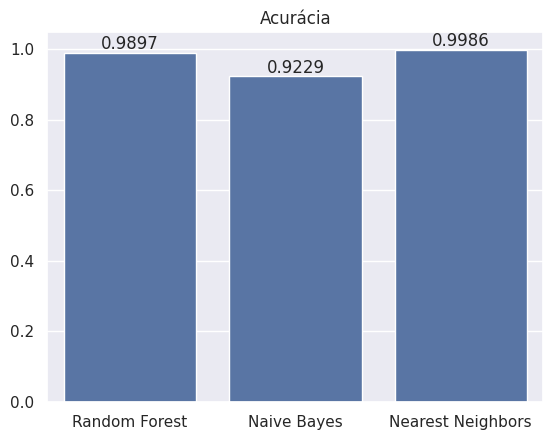

In [ ]:
axes = sns.barplot(x=names, y=score_list, color='b')
axes.bar_label(axes.containers[0])
axes.set_title("Acurácia")

#### Confusion Matrix

In [ ]:
cm = []
cm.append(confusion_matrix(y_test, y_pred[0]))
cm.append(confusion_matrix(y_test, y_pred[1]))
cm.append(confusion_matrix(y_test, y_pred[2]))

[]

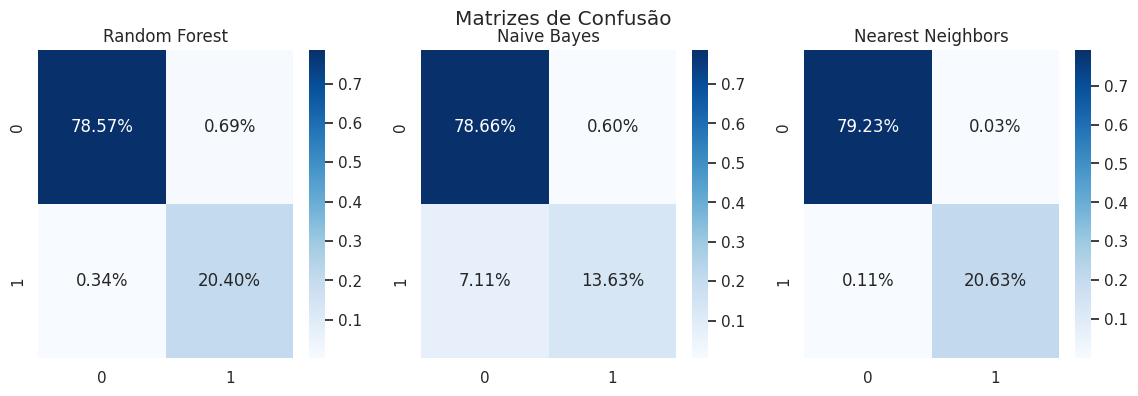

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

fig.suptitle("Matrizes de Confusão")

sns.heatmap(cm[0]/np.sum(cm[0]), annot=True, fmt='.2%', cmap='Blues', ax=axs[0])
axs[0].set_title(names[0])

sns.heatmap(cm[1]/np.sum(cm[1]), annot=True, fmt='.2%', cmap='Blues', ax=axs[1])
axs[1].set_title(names[1])

sns.heatmap(cm[2]/np.sum(cm[2]), annot=True, fmt='.2%', cmap='Blues', ax=axs[2])
axs[2].set_title(names[2])

plt.plot()

#### ROC AUC Curve

[]

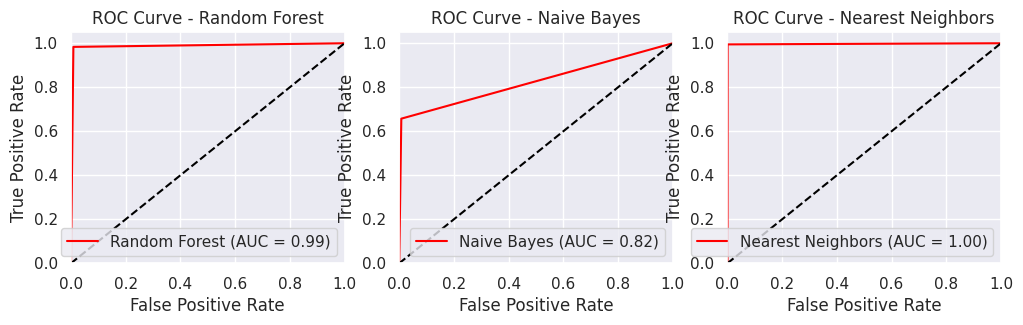

In [ ]:
fpr = []
tpr = []
auc_scores = []

for i, clf in enumerate(classifiers):
  fpr_temp, tpr_temp, thresholds = roc_curve(y_test, y_pred[i])
  fpr.append(fpr_temp)
  tpr.append(tpr_temp)
  auc_scores.append(auc(fpr_temp, tpr_temp))

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

axs[0].plot(fpr[0], tpr[0], label=f'{names[0]} (AUC = {auc_scores[0]:.2f})', color='red')
axs[0].plot([0, 1], [0, 1], color='black', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title(f'ROC Curve - {names[0]}')
axs[0].legend(loc="lower right")

axs[1].plot(fpr[1], tpr[1], label=f'{names[1]} (AUC = {auc_scores[1]:.2f})', color='red')
axs[1].plot([0, 1], [0, 1], color='black', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title(f'ROC Curve - {names[1]}')
axs[1].legend(loc="lower right")

axs[2].plot(fpr[2], tpr[2], label=f'{names[2]} (AUC = {auc_scores[2]:.2f})', color='red')
axs[2].plot([0, 1], [0, 1], color='black', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title(f'ROC Curve - {names[2]}')
axs[2].legend(loc="lower right")

plt.plot()

#### Recall, Precision e F1-Score

In [ ]:
metrics_data = []

metrics_data.append([names[0], 'Recall', recall_score(y_test, y_pred[0])])
metrics_data.append([names[1], 'Recall', recall_score(y_test, y_pred[1])])
metrics_data.append([names[2], 'Recall', recall_score(y_test, y_pred[2])])

metrics_data.append([names[0], 'Precision', precision_score(y_test, y_pred[0])])
metrics_data.append([names[1], 'Precision', precision_score(y_test, y_pred[1])])
metrics_data.append([names[2], 'Precision', precision_score(y_test, y_pred[2])])

metrics_data.append([names[0], 'F1 Score', f1_score(y_test, y_pred[0])])
metrics_data.append([names[1], 'F1 Score', f1_score(y_test, y_pred[1])])
metrics_data.append([names[2], 'F1 Score', f1_score(y_test, y_pred[2])])

In [ ]:
metrics_df = pd.DataFrame(data=metrics_data, columns=['Classifier', 'Metric', 'Score'])
metrics_df

,Classifier,Metric,Score
0,Random Forest,Recall,0.983474
1,Naive Bayes,Recall,0.657249
2,Nearest Neighbors,Recall,0.994821
3,Random Forest,Precision,0.967225
4,Naive Bayes,Precision,0.957697
5,Nearest Neighbors,Precision,0.998396
6,Random Forest,F1 Score,0.975282
7,Naive Bayes,F1 Score,0.779525
8,Nearest Neighbors,F1 Score,0.996605


Text(0.5, 0.98, 'Comparação entre Métricas')

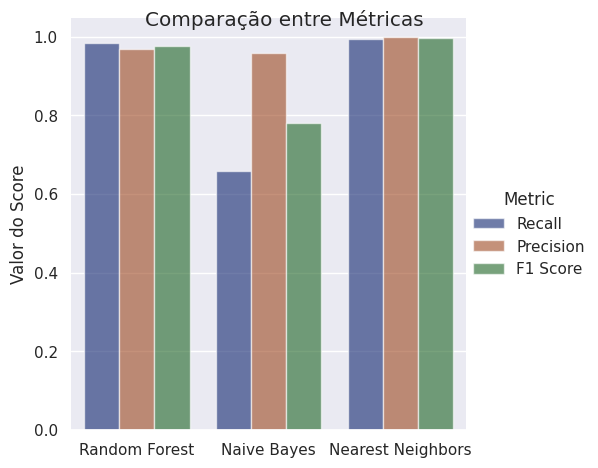

In [ ]:
g = sns.catplot(data=metrics_df, kind="bar", x="Classifier", y="Score", hue="Metric", palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels("", "Valor do Score")
g.fig.suptitle("Comparação entre Métricas")